# Missing Values, Feature Engineering, and Exploratory Data Analysis 

In this notebook, we further clean the data by checking for missing values and imputing the missing values as seen fit. We  also engineer new features from the preexisting features given by our data. Finally, we perform Exploratory Data Analysis to understand our data visually, explore the distributions, and detect outliers.

**Importing the libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("../dataset_wrangled/target.csv")

In [3]:
df.head()

,symbol,date_x,close_x,date_y,close_y,return,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,target
0,K,2013-12-27,60.980000,2014-12-26,67.010002,9.888491,2013-12-28,1.432000e+09,-50000000.0,4000000.0,...,3.835000e+09,3.545000e+09,1.192900e+10,1.547400e+10,1.479200e+10,-2.999000e+09,2013.0,4.98,3.628514e+08,0
1,SWK,2013-12-27,81.010002,2014-12-26,97.050003,19.800025,2013-12-28,2.772400e+09,-500000.0,-7800000.0,...,3.236000e+09,6.799200e+09,9.735900e+09,1.653510e+10,1.088950e+10,-1.454400e+09,2013.0,3.16,1.486392e+08,0
2,AAP,2013-12-27,109.919998,2014-12-26,160.000000,45.560410,2013-12-28,2.609239e+09,-32428000.0,2698000.0,...,2.764785e+09,1.516205e+09,4.048569e+09,5.564774e+09,6.493814e+09,-1.078900e+08,2013.0,5.36,7.308918e+07,1
3,AVY,2013-12-27,50.480000,2014-12-26,52.619999,4.239301,2013-12-28,1.477200e+09,-136000000.0,-36600000.0,...,1.554100e+09,1.492200e+09,3.118400e+09,4.610600e+09,6.140000e+09,-1.172200e+09,2013.0,2.19,9.735160e+07,0
4,CERN,2013-12-27,55.580002,2014-12-26,65.709999,18.225975,2013-12-28,3.765790e+08,-9599000.0,12042000.0,...,6.404320e+08,3.167664e+09,9.307000e+08,4.098364e+09,2.910748e+09,-2.825100e+07,2013.0,1.16,3.434086e+08,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 84 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   symbol                                               436 non-null    object 
 1   date_x                                               436 non-null    object 
 2   close_x                                              436 non-null    float64
 3   date_y                                               436 non-null    object 
 4   close_y                                              436 non-null    float64
 5   return                                               436 non-null    float64
 6   Period Ending                                        436 non-null    object 
 7   Accounts Payable                                     436 non-null    float64
 8   Accounts Receivable                                  436 non-null    f

All the features are of the correct type. However, we can see that there are some features with missing values

# Idenitfying Missing Values

In [5]:
# Find features with missing values
null_columns = df.columns[df.isna().any()].tolist()
null_columns

['Cash Ratio',
 'Current Ratio',
 'Quick Ratio',
 'For Year',
 'Earnings Per Share',
 'Estimated Shares Outstanding']

In [6]:
# The number of null values for each column
df[null_columns].isnull().sum()

Cash Ratio                      71
Current Ratio                   71
Quick Ratio                     71
For Year                        14
Earnings Per Share              26
Estimated Shares Outstanding    26
dtype: int64

In [7]:
# An original copy of the data before we impute missing values
original = df.copy

**Check values in 'For Year**

In [8]:
df['For Year'].value_counts()

2014.0    395
2013.0     27
Name: For Year, dtype: int64

In [9]:
# Dropping 'For Year' column: no useful information
df.drop(['For Year'], axis=1, inplace=True)

#### Check Missing Values for Earnings Per Share and Estimated Shares Outstanding

In [10]:
features = ['symbol', 'Period Ending','Net Income', 'Estimated Shares Outstanding', 
            'Earnings Per Share']

# tickers with missing values
test = df[df['Earnings Per Share'].isnull()]
test[features]

,symbol,Period Ending,Net Income,Estimated Shares Outstanding,Earnings Per Share
7,VFC,2013-12-31,1.210119e+09,NaN,NaN
8,SNA,2013-12-31,3.503000e+08,NaN,NaN
31,ULTA,2014-02-02,2.028490e+08,NaN,NaN
36,STZ,2014-02-28,1.943100e+09,NaN,NaN
56,NKE,2014-05-31,2.693000e+09,NaN,NaN
65,NWS,2014-06-30,2.390000e+08,NaN,NaN
68,HAR,2014-06-30,2.346920e+08,NaN,NaN
73,USB,2014-07-31,2.602000e+08,NaN,NaN
90,V,2014-09-30,5.438000e+09,NaN,NaN
94,KEY,2014-09-30,3.438300e+07,NaN,NaN


In [11]:
# Missing data was scraped from ycharts historical financial information
null_eps = {
    'VFC':[2.71, 446809000],
    'SNA':[5.93, 59100000],
    'ULTA':[3.15, 64460000],
    'STZ':[9.83, 197570000],
    'NKE':[1.49, 1812000000],
    'NWS':[0.41, 579700000],  
    'V':[2.16, 2523000000],
    'TSN':[2.37, 364000000],
    'LH':[5.91, 86400000],
    'LKQ':[1.25, 306040000],
    'UAA':[0.47, 438760000],
    'MNST':[0.92, 522860000],
    'TGNA':[4.58, 231910000],
    'EXC':[1.88, 864000000],
    'ESS':[2.06, 56700000],
    'FE':[.71, 421000000],
    'KMI':[.89, 1137000000],
    'DISCK': [1.66, 687000000],
    'AXP':[5.56, 1051000000],
    'WAT':[5.07, 85150000],
    'HSY':[3.77, 224840000]         
}

USB, KEY, PG will be dropped due to inconsistencies in the data. See reasoning further below...

Harman Industrials (HAR) and General (GGP) was acquired by another company. I could not find historical information. These rows will also be dropped.

**Note:** Diluted EPS and average diluted shares outstanding are used. [Diluted shares](https://ycharts.com/companies/NKE/eps_annual) are the amount of shares outstanding after all convertible securities, options , and warrants are exercised 

In [12]:
drop_tickers = set(test['symbol'].values) - set(null_eps.keys())
drop_tickers

{'GGP', 'HAR', 'KEY', 'PG', 'USB'}

In [13]:
# Creating a DataFrame of the scraped values: null_df
null_df = pd.DataFrame.from_dict(null_eps, orient='index', 
                                 columns=['New Earnings Per Share','New Estimated Shares Outstanding'])
null_df['symbol'] = null_df.index

In [14]:
# Merge imputed values of the null dataframe to the original dataframe
df=df.merge(null_df, how='left', on='symbol')

In [15]:
# Create a final column for each feature with all null values filled
# np.where is used to combine the old and new columns to form a final column with no null values.
df['EPS']= np.where(df['New Earnings Per Share'].notnull(), df['New Earnings Per Share'], df['Earnings Per Share'])

df['Shares Outstanding']= np.where(
    df['New Estimated Shares Outstanding'].notnull(), 
    df['New Estimated Shares Outstanding'], 
    df['Estimated Shares Outstanding'])

In [16]:
# Drop repetitive columns
df = df.drop(['Earnings Per Share','Estimated Shares Outstanding', 
              'New Earnings Per Share','New Estimated Shares Outstanding'], axis=1)

In [17]:
# Check final columns
df.head(2)

,symbol,date_x,close_x,date_y,close_y,return,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,target,EPS,Shares Outstanding
0,K,2013-12-27,60.980000,2014-12-26,67.010002,9.888491,2013-12-28,1.432000e+09,-50000000.0,4000000.0,...,3.267000e+09,3.835000e+09,3.545000e+09,1.192900e+10,1.547400e+10,1.479200e+10,-2.999000e+09,0,4.98,3.628514e+08
1,SWK,2013-12-27,81.010002,2014-12-26,97.050003,19.800025,2013-12-28,2.772400e+09,-500000.0,-7800000.0,...,4.016600e+09,3.236000e+09,6.799200e+09,9.735900e+09,1.653510e+10,1.088950e+10,-1.454400e+09,0,3.16,1.486392e+08


**Double check** 
I will double check that the missing values I scraped are correct. I will do so by taking Net Income and dividing it by the imputed Shares Outstanding values. Then, I will compare these values with the imputed EPS values. They should be equal

**NOTE:** This checking process is how I discovered that a few of the tickers actually have wrong fundamental information as their net income did not match with ycharts. These tickers were USB, KEY, and PG. The Net Income for these companies did not match with the net income found on ycharts. My assumption is that the original data scraped by Kaggle user providing the data contains some errors...


In [18]:
df['eps_check'] = round(df['Net Income']/df['Shares Outstanding'], 2)

In [19]:
test_list = test['symbol'].values

In [20]:
subset =['symbol','Net Income','Shares Outstanding','EPS','eps_check']

In [21]:
df[df['symbol'].isin(test_list)][subset]

,symbol,Net Income,Shares Outstanding,EPS,eps_check
7,VFC,1.210119e+09,4.468090e+08,2.71,2.71
8,SNA,3.503000e+08,5.910000e+07,5.93,5.93
31,ULTA,2.028490e+08,6.446000e+07,3.15,3.15
36,STZ,1.943100e+09,1.975700e+08,9.83,9.83
56,NKE,2.693000e+09,1.812000e+09,1.49,1.49
65,NWS,2.390000e+08,5.797000e+08,0.41,0.41
68,HAR,2.346920e+08,NaN,NaN,NaN
73,USB,2.602000e+08,NaN,NaN,NaN
90,V,5.438000e+09,2.523000e+09,2.16,2.16
94,KEY,3.438300e+07,NaN,NaN,NaN


Other than some slight discrepancies of a few cents the values are the same

In [22]:
mask = df[df['symbol'].isin(drop_tickers)].index
df = df.drop(mask)

df['EPS'].isna().any()

False

In [23]:
df.drop(['eps_check'], axis=1, inplace=True)

### Checking Missing Values for Current Ratio, Cash Ratio, and Quick Ratio

In [24]:
test2 = df[['symbol', 'Total Current Assets', 'Total Current Liabilities', 
            'Cash and Cash Equivalents', 'Accounts Receivable', 'Other Current Assets',
            'Current Ratio','Cash Ratio','Quick Ratio']]


In [25]:
# Check if ratio can be derived from existing features
test2['Check Current Ratio']= test2['Total Current Assets'] / test2['Total Current Liabilities']

<ipython-input-25-2116ff54fb48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Check Current Ratio']= test2['Total Current Assets'] / test2['Total Current Liabilities']


In [26]:
test2

,symbol,Total Current Assets,Total Current Liabilities,Cash and Cash Equivalents,Accounts Receivable,Other Current Assets,Current Ratio,Cash Ratio,Quick Ratio,Check Current Ratio
0,K,3.267000e+09,3.835000e+09,2.730000e+08,-5.000000e+07,322000000.0,85.0,7.0,53.0,0.851890
1,SWK,4.016600e+09,3.236000e+09,4.962000e+08,-5.000000e+05,468600000.0,124.0,15.0,79.0,1.241224
2,AAP,3.989384e+09,2.764785e+09,1.112471e+09,-3.242800e+07,42761000.0,144.0,40.0,52.0,1.442927
3,AVY,2.091800e+09,1.554100e+09,3.516000e+08,-1.360000e+08,126200000.0,135.0,23.0,103.0,1.345988
4,CERN,1.761708e+09,6.404320e+08,2.023770e+08,-9.599000e+06,175488000.0,275.0,137.0,270.0,2.750812
...,...,...,...,...,...,...,...,...,...,...
431,AN,3.999200e+09,3.882000e+09,7.540000e+07,-8.030000e+07,207000000.0,103.0,2.0,28.0,1.030191
432,ANTM,0.000000e+00,0.000000e+00,2.151700e+09,-1.899700e+09,0.0,NaN,NaN,NaN,NaN
433,HSY,2.247047e+09,1.935647e+09,3.748540e+08,-6.746400e+07,276571000.0,116.0,24.0,75.0,1.160876
434,EW,2.231100e+09,4.261000e+08,6.538000e+08,-2.680000e+07,170500000.0,524.0,338.0,454.0,5.236095


In [27]:
test2.isnull().sum().sort_values(ascending=False)

Check Current Ratio          69
Quick Ratio                  69
Cash Ratio                   69
Current Ratio                69
Other Current Assets          0
Accounts Receivable           0
Cash and Cash Equivalents     0
Total Current Liabilities     0
Total Current Assets          0
symbol                        0
dtype: int64

"Check Current Ratio" has 71 missing values, the same as "Current Ratio." This must mean that total current assets or total current liabilities is causing the NAN value

In [28]:
# Dataframe only of rows with null values 
test2 = test2[test2.isnull().any(axis=1)]
test2

,symbol,Total Current Assets,Total Current Liabilities,Cash and Cash Equivalents,Accounts Receivable,Other Current Assets,Current Ratio,Cash Ratio,Quick Ratio,Check Current Ratio
95,DHI,0.0,0.0,6.718000e+08,0.000000e+00,0.0,NaN,NaN,NaN,NaN
112,LEN,0.0,0.0,8.955780e+08,-5.083640e+08,0.0,NaN,NaN,NaN,NaN
125,TRV,0.0,0.0,3.740000e+08,1.930000e+08,0.0,NaN,NaN,NaN,NaN
136,UNM,0.0,0.0,1.025000e+08,-2.150000e+07,0.0,NaN,NaN,NaN,NaN
150,SCHW,0.0,0.0,3.214400e+10,-1.681000e+09,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
417,HIG,0.0,0.0,3.990000e+08,-1.440000e+08,0.0,NaN,NaN,NaN,NaN
423,AMP,0.0,0.0,5.642000e+09,-4.230000e+08,0.0,NaN,NaN,NaN,NaN
430,HUM,0.0,0.0,1.935000e+09,-2.640000e+08,0.0,NaN,NaN,NaN,NaN
432,ANTM,0.0,0.0,2.151700e+09,-1.899700e+09,0.0,NaN,NaN,NaN,NaN


The rows with NaN all have Total Current Assets and Total Current Liabilities of zero. NaN make intuitive sense as you cannot divide by zero

What's also interesting is that most of these companies with null values seem to be part of the financial sector. I will check the data further below using a dataset that includes the sectors of each company

In [29]:
# list of tickers to use as filtering mask
test2_list = list(test2['symbol'].values)

In [30]:
# Loading Dataset with information about sectors/industries
securities_df = pd.read_csv('../Datasets/securities.csv')
securities_df.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [31]:
securities_df.set_index('Ticker symbol', inplace=True)

In [32]:
# Subsetting DataFrame for tickers with null values
test2_sector = securities_df.loc[test2_list]
test2_sector

,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
Ticker symbol,,,,,,,
DHI,D. R. Horton,reports,Consumer Discretionary,Homebuilding,"Fort Worth, Texas",NaN,882184
LEN,Lennar Corp.,reports,Consumer Discretionary,Homebuilding,"Miami, Florida",NaN,920760
TRV,The Travelers Companies Inc.,reports,Financials,Property & Casualty Insurance,"New York, New York",NaN,86312
UNM,Unum Group,reports,Financials,Diversified Financial Services,"Chattanooga, Tennessee",1994-03-01,5513
SCHW,Charles Schwab Corporation,reports,Financials,Investment Banking & Brokerage,"San Francisco, California",NaN,316709
...,...,...,...,...,...,...,...
HIG,Hartford Financial Svc.Gp.,reports,Financials,Property & Casualty Insurance,"Hartford, Connecticut",NaN,874766
AMP,Ameriprise Financial,reports,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",NaN,820027
HUM,Humana Inc.,reports,Health Care,Managed Health Care,"Louisville, Kentucky",NaN,49071


In [33]:
test2_sector['GICS Sector'].value_counts()

Financials                42
Real Estate               19
Health Care                5
Consumer Discretionary     3
Name: GICS Sector, dtype: int64

It appears that most of these companies belong to the financial sector. Information on the Current Ratio, Cash Ratio, and Quick Ratio is difficult to obtain for companies in the financial sector due to the nature of current assets and current liabilities. An explanation is given by [investopedia](https://www.investopedia.com/ask/answers/101515/do-banks-have-working-capital.asp#:~:text=Banks%20do%20not%20organize%20their,can%20be%20withdrawn%20on%20demand):

>"The concept of working capital, also known as net working capital (NWC), does not apply to banks since financial institutions do not have typical current assets and liabilities, such as inventories and accounts payable (AP). Also, it is very hard to determine current liabilities for banks because banks typically rely on deposits as a source for their capital, and it is not certain when customers will demand their deposits back."

We could try to create a proxy with the pieces of information that add up to current assets; however, since most of these companies are in the financial sector and the number of null values for these features is large, we have proceeded to drop these features.

### Droping all columns with null values

In [34]:
df.shape

(431, 83)

In [35]:
# Storing the null values in case it will be needed
df_null_values =df[['Current Ratio','Cash Ratio','Quick Ratio']]

In [36]:
df.dropna(axis=1, inplace=True)

In [37]:
df.shape

(431, 80)

In [38]:
# Double chekcking all null columns are dropped
df.isna().sum().sort_values(ascending=False).head(10)

Shares Outstanding                                0
EPS                                               0
Earnings Before Tax                               0
Effect of Exchange Rate                           0
Equity Earnings/Loss Unconsolidated Subsidiary    0
Fixed Assets                                      0
Goodwill                                          0
Gross Margin                                      0
Gross Profit                                      0
Income Tax                                        0
dtype: int64

## Engineering Additional Financial Ratios

I will create additional features, which can be derived from the given features in the data. These derived metrics could be potentially useful for classification. These additionals features are: ROTA, Debt to Equity Ratio, Free Cash Flow, Price to Earnings, Price to Book Value, and Price to Sales

In [39]:
# Return on Total Assets(ROTA) = EBIT / Total Assets
# Useful for comparing companies earnings without interference from different capital structures and tax rates
df['ROTA'] = df['Earnings Before Interest and Tax'] / df['Total Assets']

In [40]:
# Debt to Equity Ratio: Total Debt / Total equity (shareholder's equity)
df['Debt-Equity Ratio'] = (df['Total Liabilities'] / df['Total Equity'])
df['Debt-Equity Ratio'].describe()

count    431.000000
mean       1.480609
std       27.308929
min     -420.979167
25%        0.969957
50%        1.626192
75%        2.822049
max      166.041096
Name: Debt-Equity Ratio, dtype: float64


The descriptive stats show a wide range of ratios. The Debt to equity ratio shows the relation between assets financed by creditors and assets financed by stockholders. A high ratio indicates that a significant amount of funds are provided by creditors, meaning the company is highly leveraged. A lower value indicates that the company is financed heavily by stockholders. The min value is -420. Negative debt-equity ratios indicate that a company has more liabilities than assets.
ssets.

In [41]:
# Free Cash Flow (FCF): 
# Represents the cash flow availabe for spending by the company after funding operations and capital expenditures. 
df['FCF'] = df['Net Cash Flow-Operating'] - df['Capital Expenditures']

In [42]:
df.head()

,symbol,date_x,close_x,date_y,close_y,return,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,...,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF
0,K,2013-12-27,60.980000,2014-12-26,67.010002,9.888491,2013-12-28,1.432000e+09,-50000000.0,4000000.0,...,1.192900e+10,1.547400e+10,1.479200e+10,-2.999000e+09,0,4.98,3.628514e+08,0.183598,3.365021,2.444000e+09
1,SWK,2013-12-27,81.010002,2014-12-26,97.050003,19.800025,2013-12-28,2.772400e+09,-500000.0,-7800000.0,...,9.735900e+09,1.653510e+10,1.088950e+10,-1.454400e+09,0,3.16,1.486392e+08,0.045219,1.431918,1.208300e+09
2,AAP,2013-12-27,109.919998,2014-12-26,160.000000,45.560410,2013-12-28,2.609239e+09,-32428000.0,2698000.0,...,4.048569e+09,5.564774e+09,6.493814e+09,-1.078900e+08,1,5.36,7.308918e+07,0.119145,2.670199,7.410070e+08
3,AVY,2013-12-27,50.480000,2014-12-26,52.619999,4.239301,2013-12-28,1.477200e+09,-136000000.0,-36600000.0,...,3.118400e+09,4.610600e+09,6.140000e+09,-1.172200e+09,0,2.19,9.735160e+07,0.092591,2.089800,4.488000e+08
4,CERN,2013-12-27,55.580002,2014-12-26,65.709999,18.225975,2013-12-28,3.765790e+08,-9599000.0,12042000.0,...,9.307000e+08,4.098364e+09,2.910748e+09,-2.825100e+07,0,1.16,3.434086e+08,0.143485,0.293813,1.048742e+09


In [43]:
# Price to Earnings(PE) Ratio: Market Value Per Share / EPS
df['P/E'] = df['close_x'] / df['EPS'] 

In [44]:
# Price to Book Value Ratio
book = (df['Total Assets'] - df['Total Liabilities']) / df['Shares Outstanding']
df['P/BV'] = df['close_x'] / book

Price to book ratio compares whether a stock is over or undervalued through comparing its net value, i.e. its assets - its liabilities, to its market capitalization  It shows the difference between the market value and the book value per share.


Book value can be thought of as the amount that shareholders would theoretically receive per share of stock held if the company went out of business and all the assets were liquidated.

In [45]:
# Price to sales ratio
df['P/S'] = df['close_x']*df['Shares Outstanding'] / df['Total Revenue']

In [46]:
df.head()

,symbol,date_x,close_x,date_y,close_y,return,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
0,K,2013-12-27,60.980000,2014-12-26,67.010002,9.888491,2013-12-28,1.432000e+09,-50000000.0,4000000.0,...,-2.999000e+09,0,4.98,3.628514e+08,0.183598,3.365021,2.444000e+09,12.244980,6.241658,1.495854
1,SWK,2013-12-27,81.010002,2014-12-26,97.050003,19.800025,2013-12-28,2.772400e+09,-500000.0,-7800000.0,...,-1.454400e+09,0,3.16,1.486392e+08,0.045219,1.431918,1.208300e+09,25.636077,1.770983,1.105768
2,AAP,2013-12-27,109.919998,2014-12-26,160.000000,45.560410,2013-12-28,2.609239e+09,-32428000.0,2698000.0,...,-1.078900e+08,1,5.36,7.308918e+07,0.119145,2.670199,7.410070e+08,20.507462,5.298731,1.237172
3,AVY,2013-12-27,50.480000,2014-12-26,52.619999,4.239301,2013-12-28,1.477200e+09,-136000000.0,-36600000.0,...,-1.172200e+09,0,2.19,9.735160e+07,0.092591,2.089800,4.488000e+08,23.050228,3.293331,0.800376
4,CERN,2013-12-27,55.580002,2014-12-26,65.709999,18.225975,2013-12-28,3.765790e+08,-9599000.0,12042000.0,...,-2.825100e+07,0,1.16,3.434086e+08,0.143485,0.293813,1.048742e+09,47.913795,6.025466,6.557301


### Dropping additional unnecessary columns

In [47]:
df = df.drop(['return','Period Ending', 'date_x','close_x','date_y','close_y'], axis=1)

In [48]:
# Setting stock 'tickers' as the index of the dataframe
df = df.set_index('symbol')

# Convert scientific notation to decimal notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Save the Clean Dataset

In [49]:
df.to_csv("../dataset_wrangled/df_clean.csv")

# Exploratory Data Analysis

##  Descriptive Statistics

In [50]:
pd.set_option('display.max_columns', None)
df.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
count,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00,431.00
mean,4855245865.43,-113079378.19,115929116.01,40.47,-1328556979.12,5354061953.60,9124359345.71,-84120278.42,1621770942.00,12706494531.32,593491897.91,1690707600.93,1083800078.89,2902815948.96,2582041218.10,-60752749.42,108174290.02,8843907053.36,3884031517.40,46.87,7360872515.08,763782645.01,1844670930.39,315805125.29,1491116825.99,-977831542.92,477958542.92,8584109278.42,23452686647.33,368169723.90,45072809.74,712097709.98,-67627679.81,3209684568.45,-535644389.79,-2682845336.43,1815213292.34,170103698.38,1791911563.81,1881008645.01,3391560830.63,158305779.58,2424394083.53,17.22,5084510225.06,700329605.57,15513572116.01,-631448554.52,438445259.86,-228279658.93,9473492027.84,-226724097.45,833037672.85,17.35,56.79,13.42,343243415.31,9740608763.34,-976327176.33,4108438779.58,3022099656.61,1075632109.05,57073082243.62,6899811556.84,4750418034.80,12253441839.91,44806039102.09,57059480942.00,20787049761.02,-4142286589.33,0.20,3.66,606645960.35,0.11,1.48,4538241547.56,26.11,1.38,3.36
std,14750951778.81,612348468.18,890130073.67,216.97,3165299402.00,11432121172.83,59837430754.22,364658809.99,9251121884.35,30447559205.86,2594973841.86,4723392037.61,2079363261.16,5691320992.14,5306212192.65,228825031.58,771023761.65,19977935817.67,7646799379.40,25.15,13515023788.13,1651054287.21,5948270572.73,940629106.50,3790967433.63,7654462340.46,2857920546.59,29301247109.62,142411965742.20,2653721208.34,174425926.56,3329740143.90,2455595901.20,6189169172.20,9765873748.31,10878332765.52,3670279873.65,2037535527.43,3633730920.36,4107567220.81,8316463880.86,1071449405.51,4582586179.74,12.33,26550993920.38,1626867249.38,112788694859.39,3087006444.04,6703239654.42,2975640717.76,55262033052.20,1973410424.29,2510528865.10,17.12,317.20,14.23,1216927982.25,26577486509.32,3915916805.95,9381105014.97,21307796895.58,5141104781.12,211601304899.61,13487276086.03,9040752569.98,26582595301.00,189237860695.63,211603050375.18,40825791502.43,14850078701.69,0.40,3.88

## Exploring the Distributions of the Features
**Subset the DataFrame first into yes and no:**
- yes: Subset of tickers that reached the 20% return threshold 
- no: subset of tickers that did not reach the 20% return threshold.

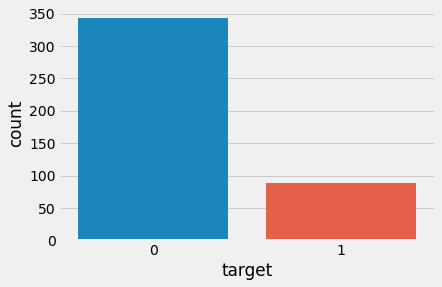

In [51]:
# Vizualition of the counts of target variable
sns.countplot(data = df, x='target')
plt.show()

In [52]:
yes = df[df['target']==1].drop(columns=['target'])
no = df[df['target']==0].drop(columns=['target'])

<ipython-input-53-79ca05244032>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


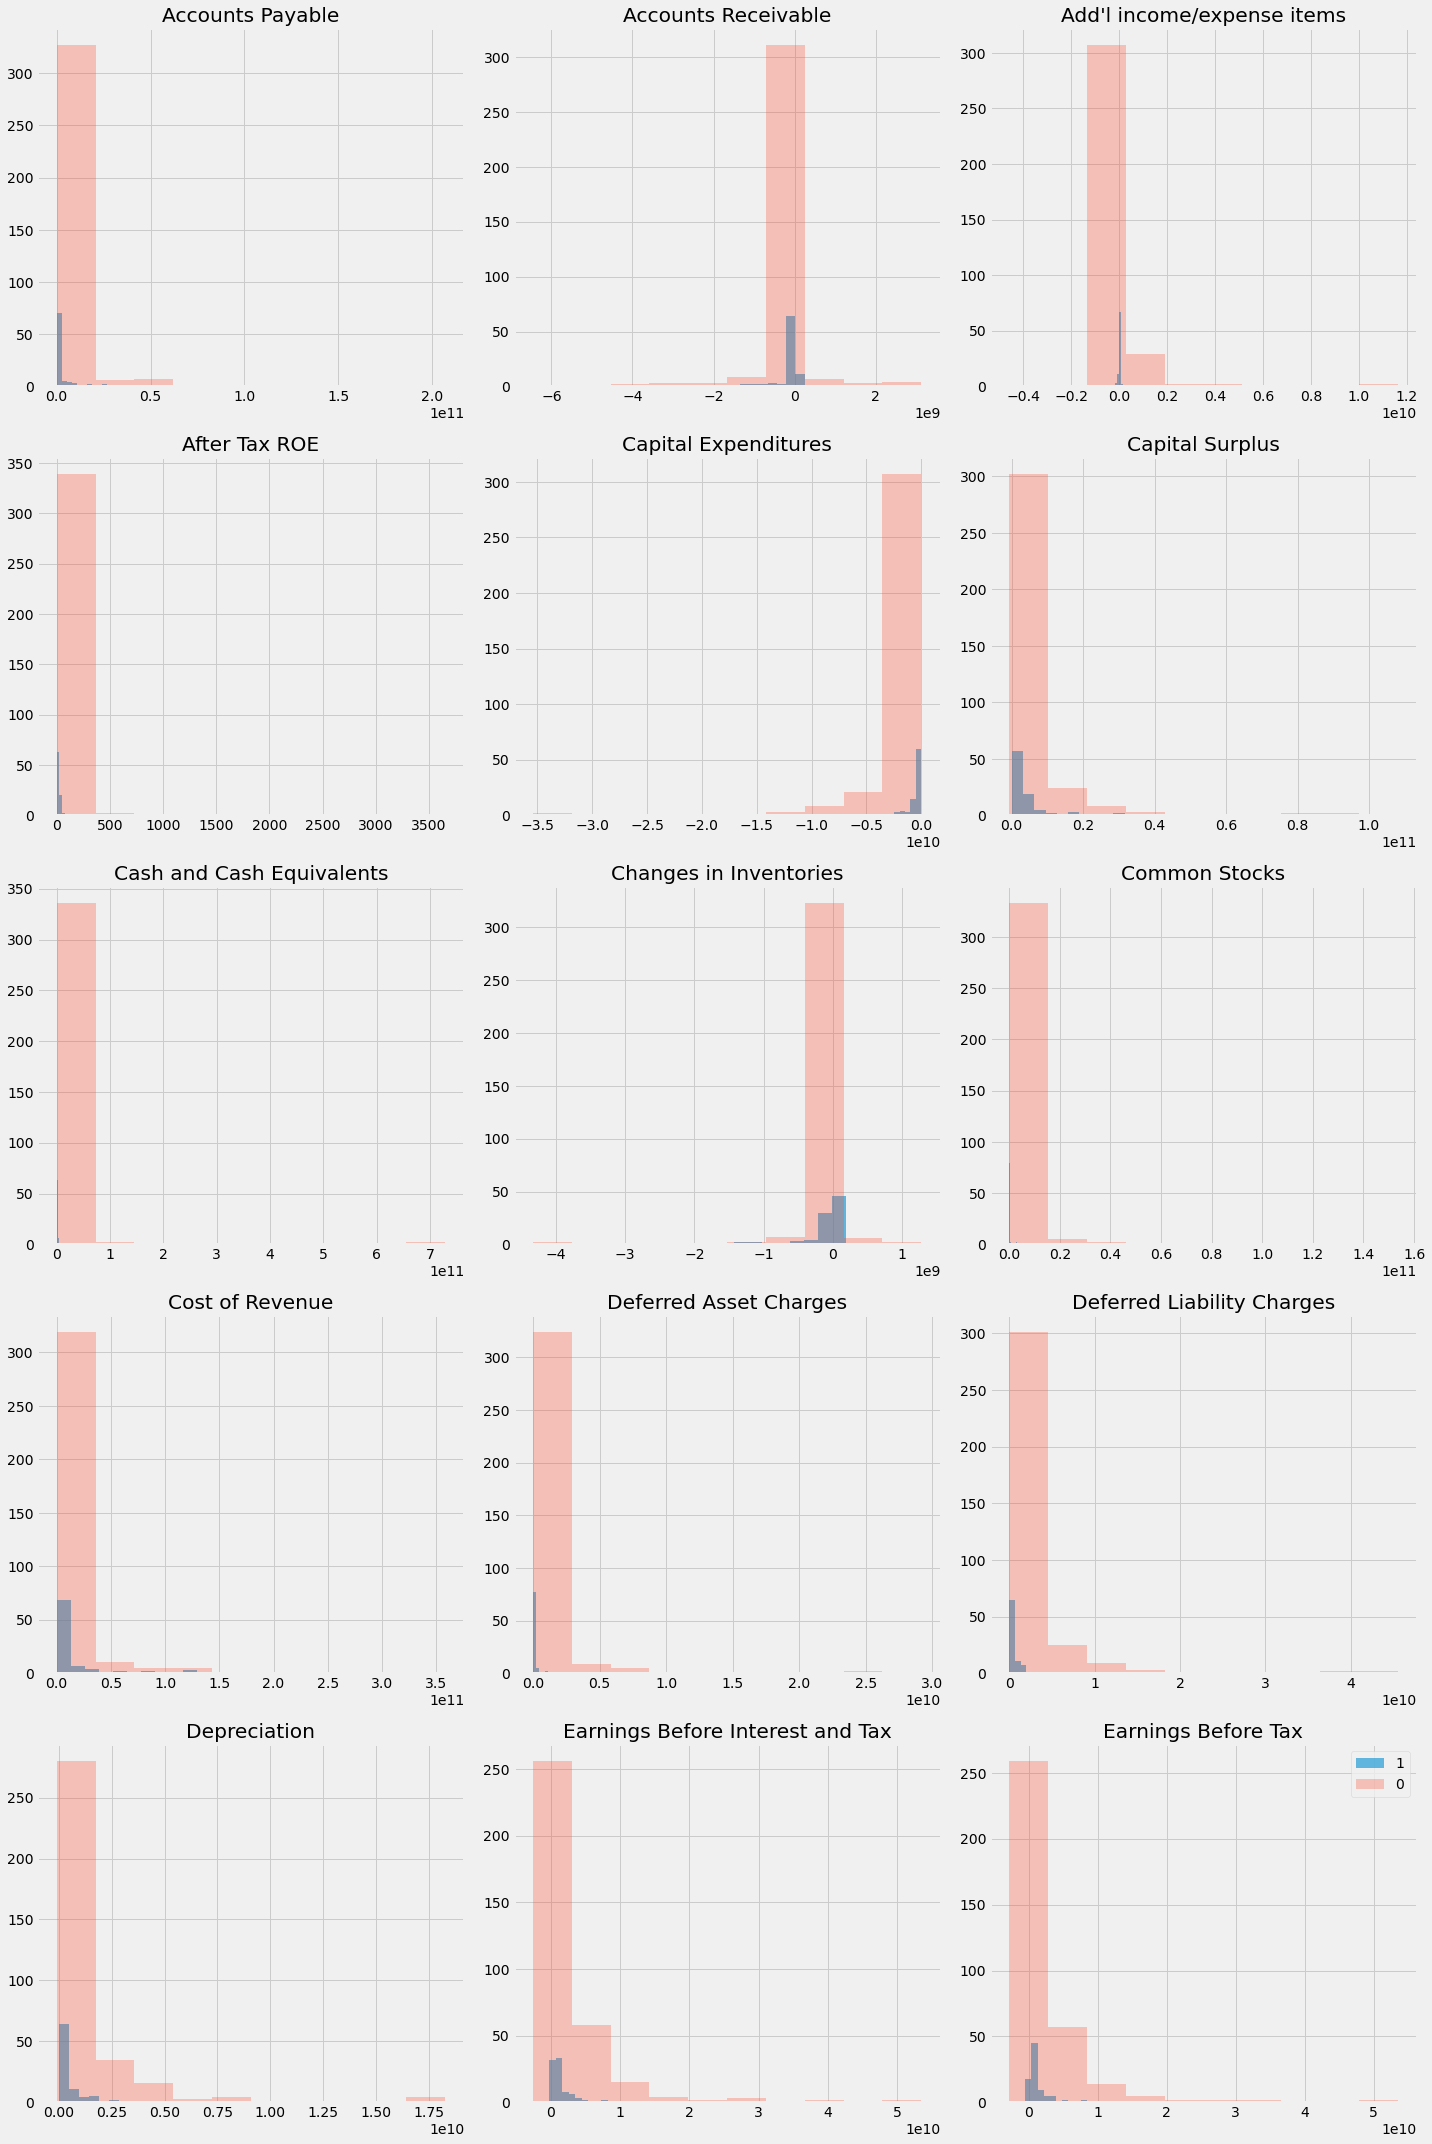

In [53]:
# histograms of features
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[:15]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[:15]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-54-8342d975ec09>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


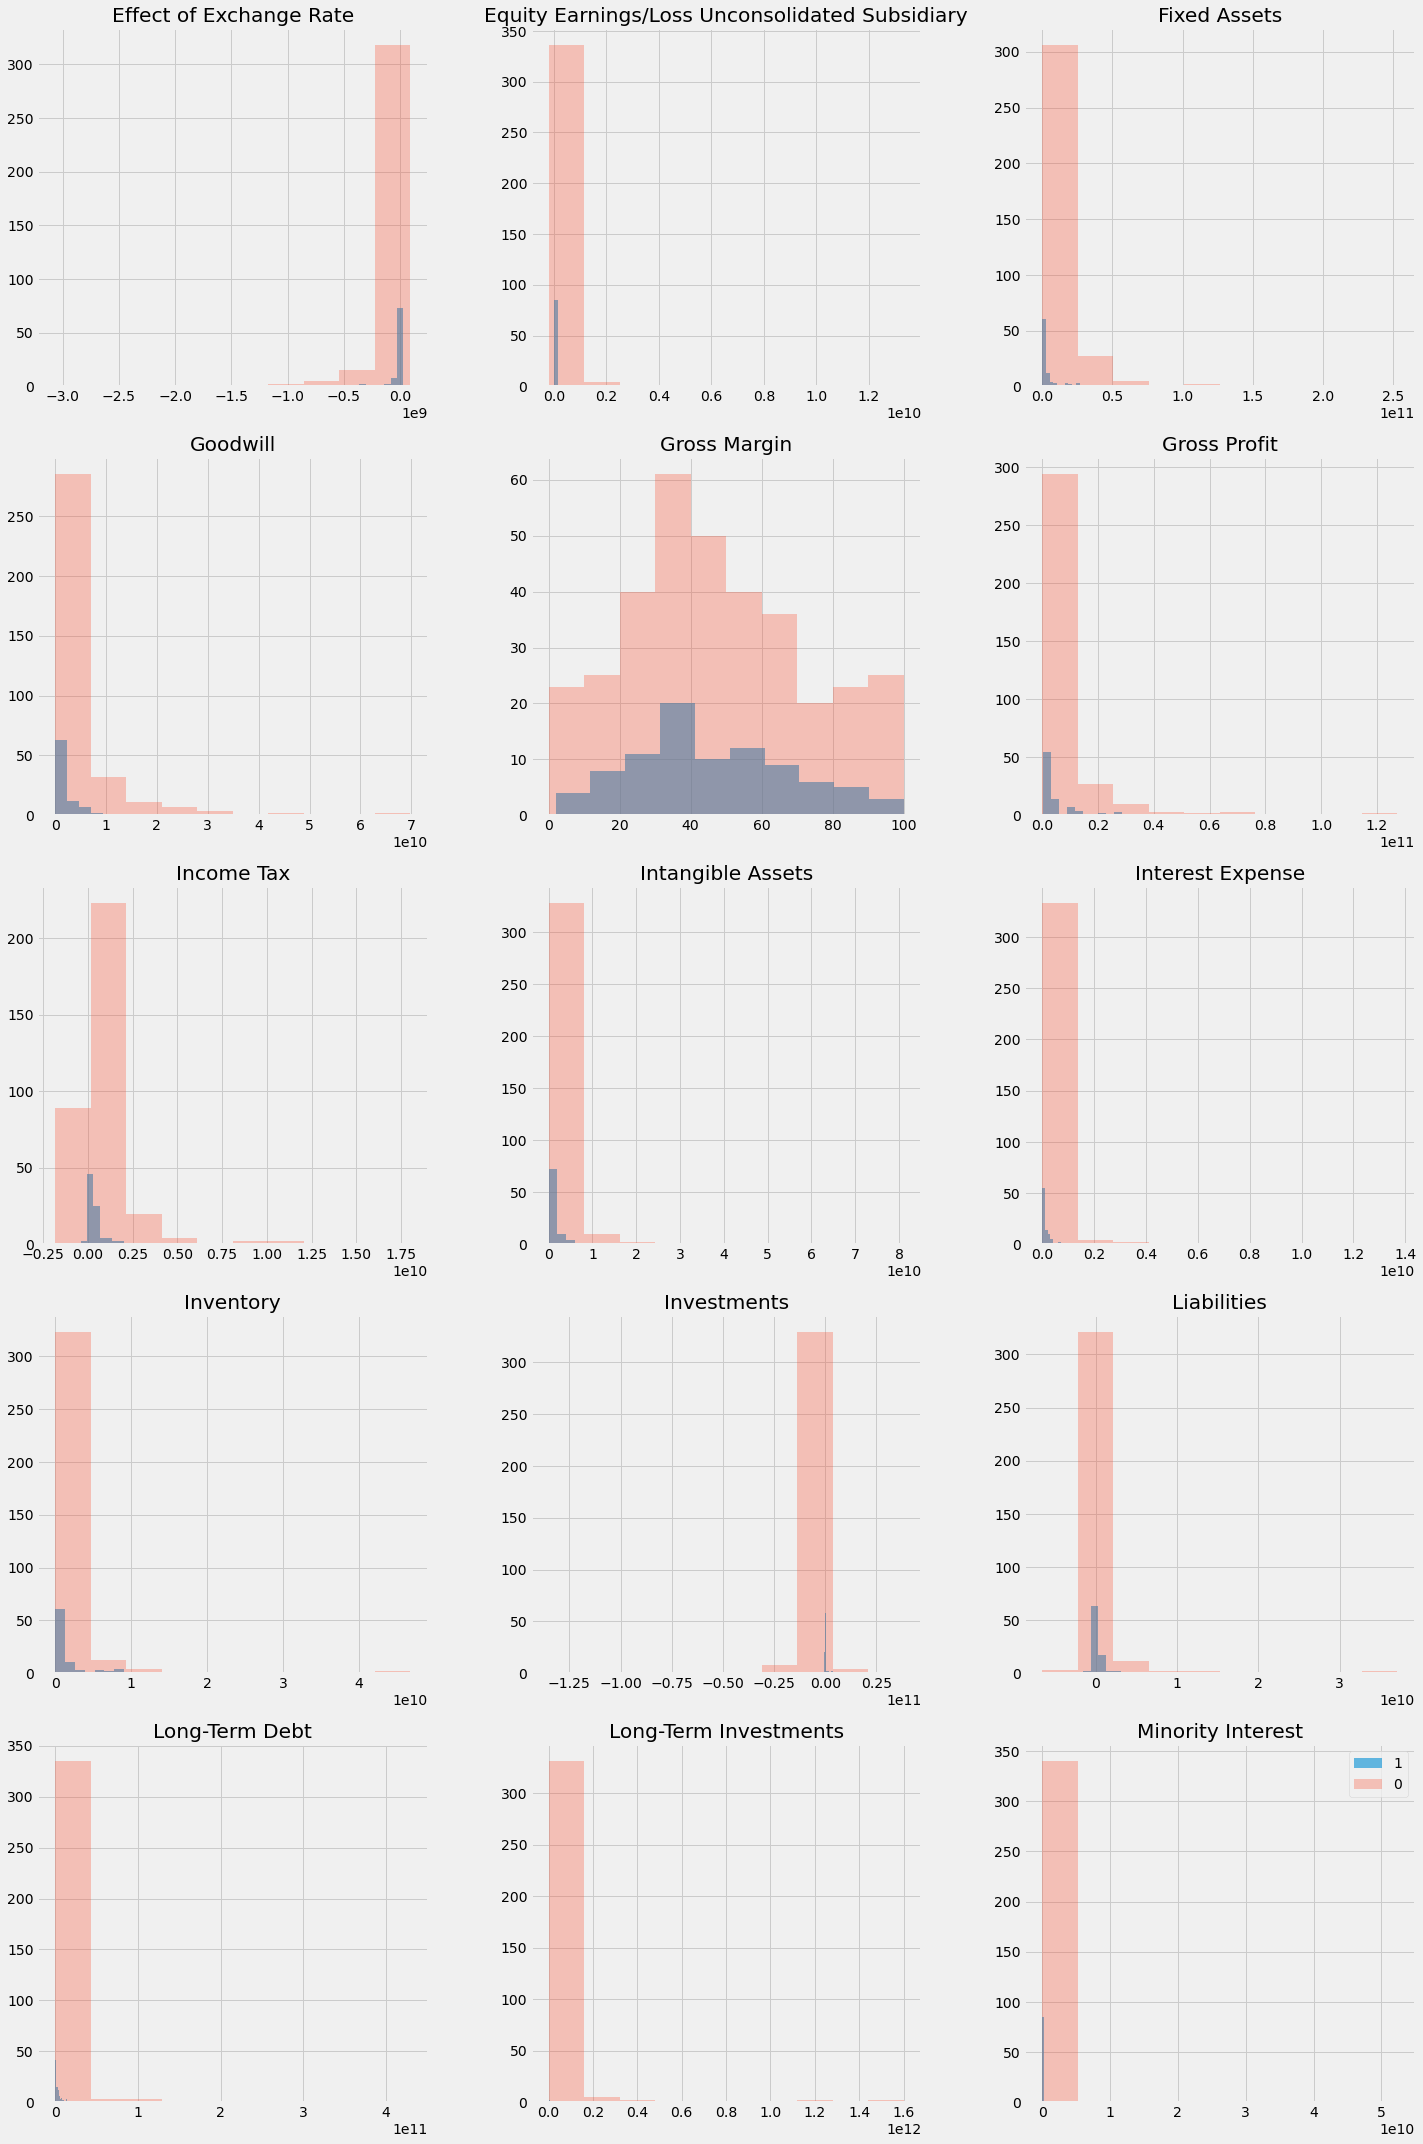

In [54]:
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[15:30]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[15:30]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-55-b618f1bce1c2>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


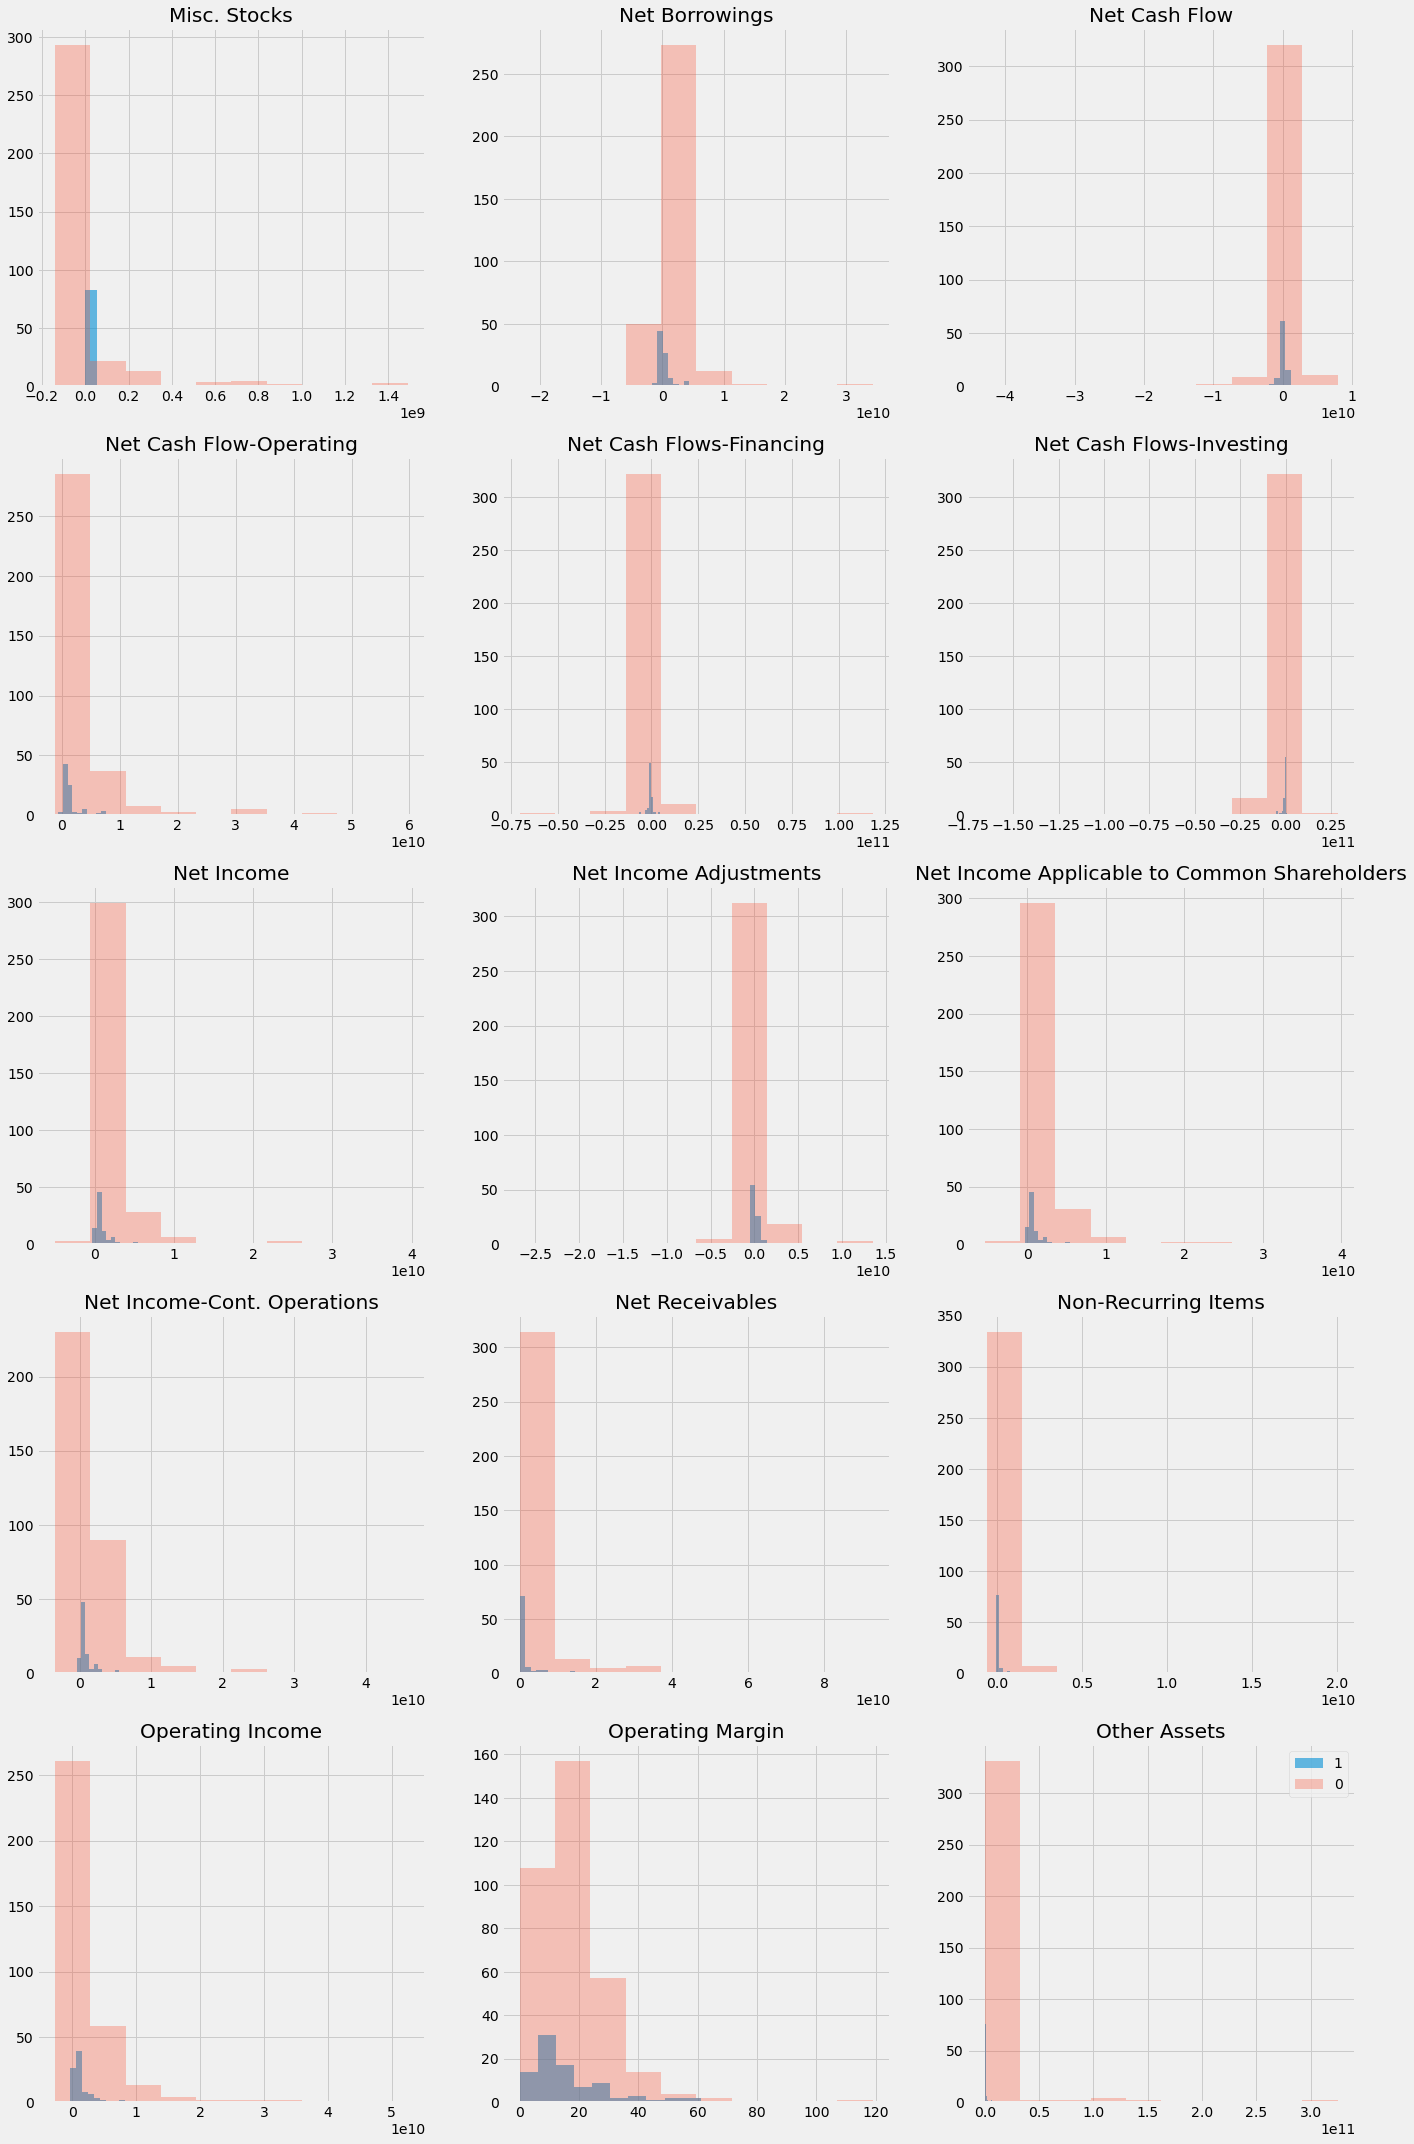

In [55]:
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[30:45]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[30:45]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-56-7fbb156b31a1>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


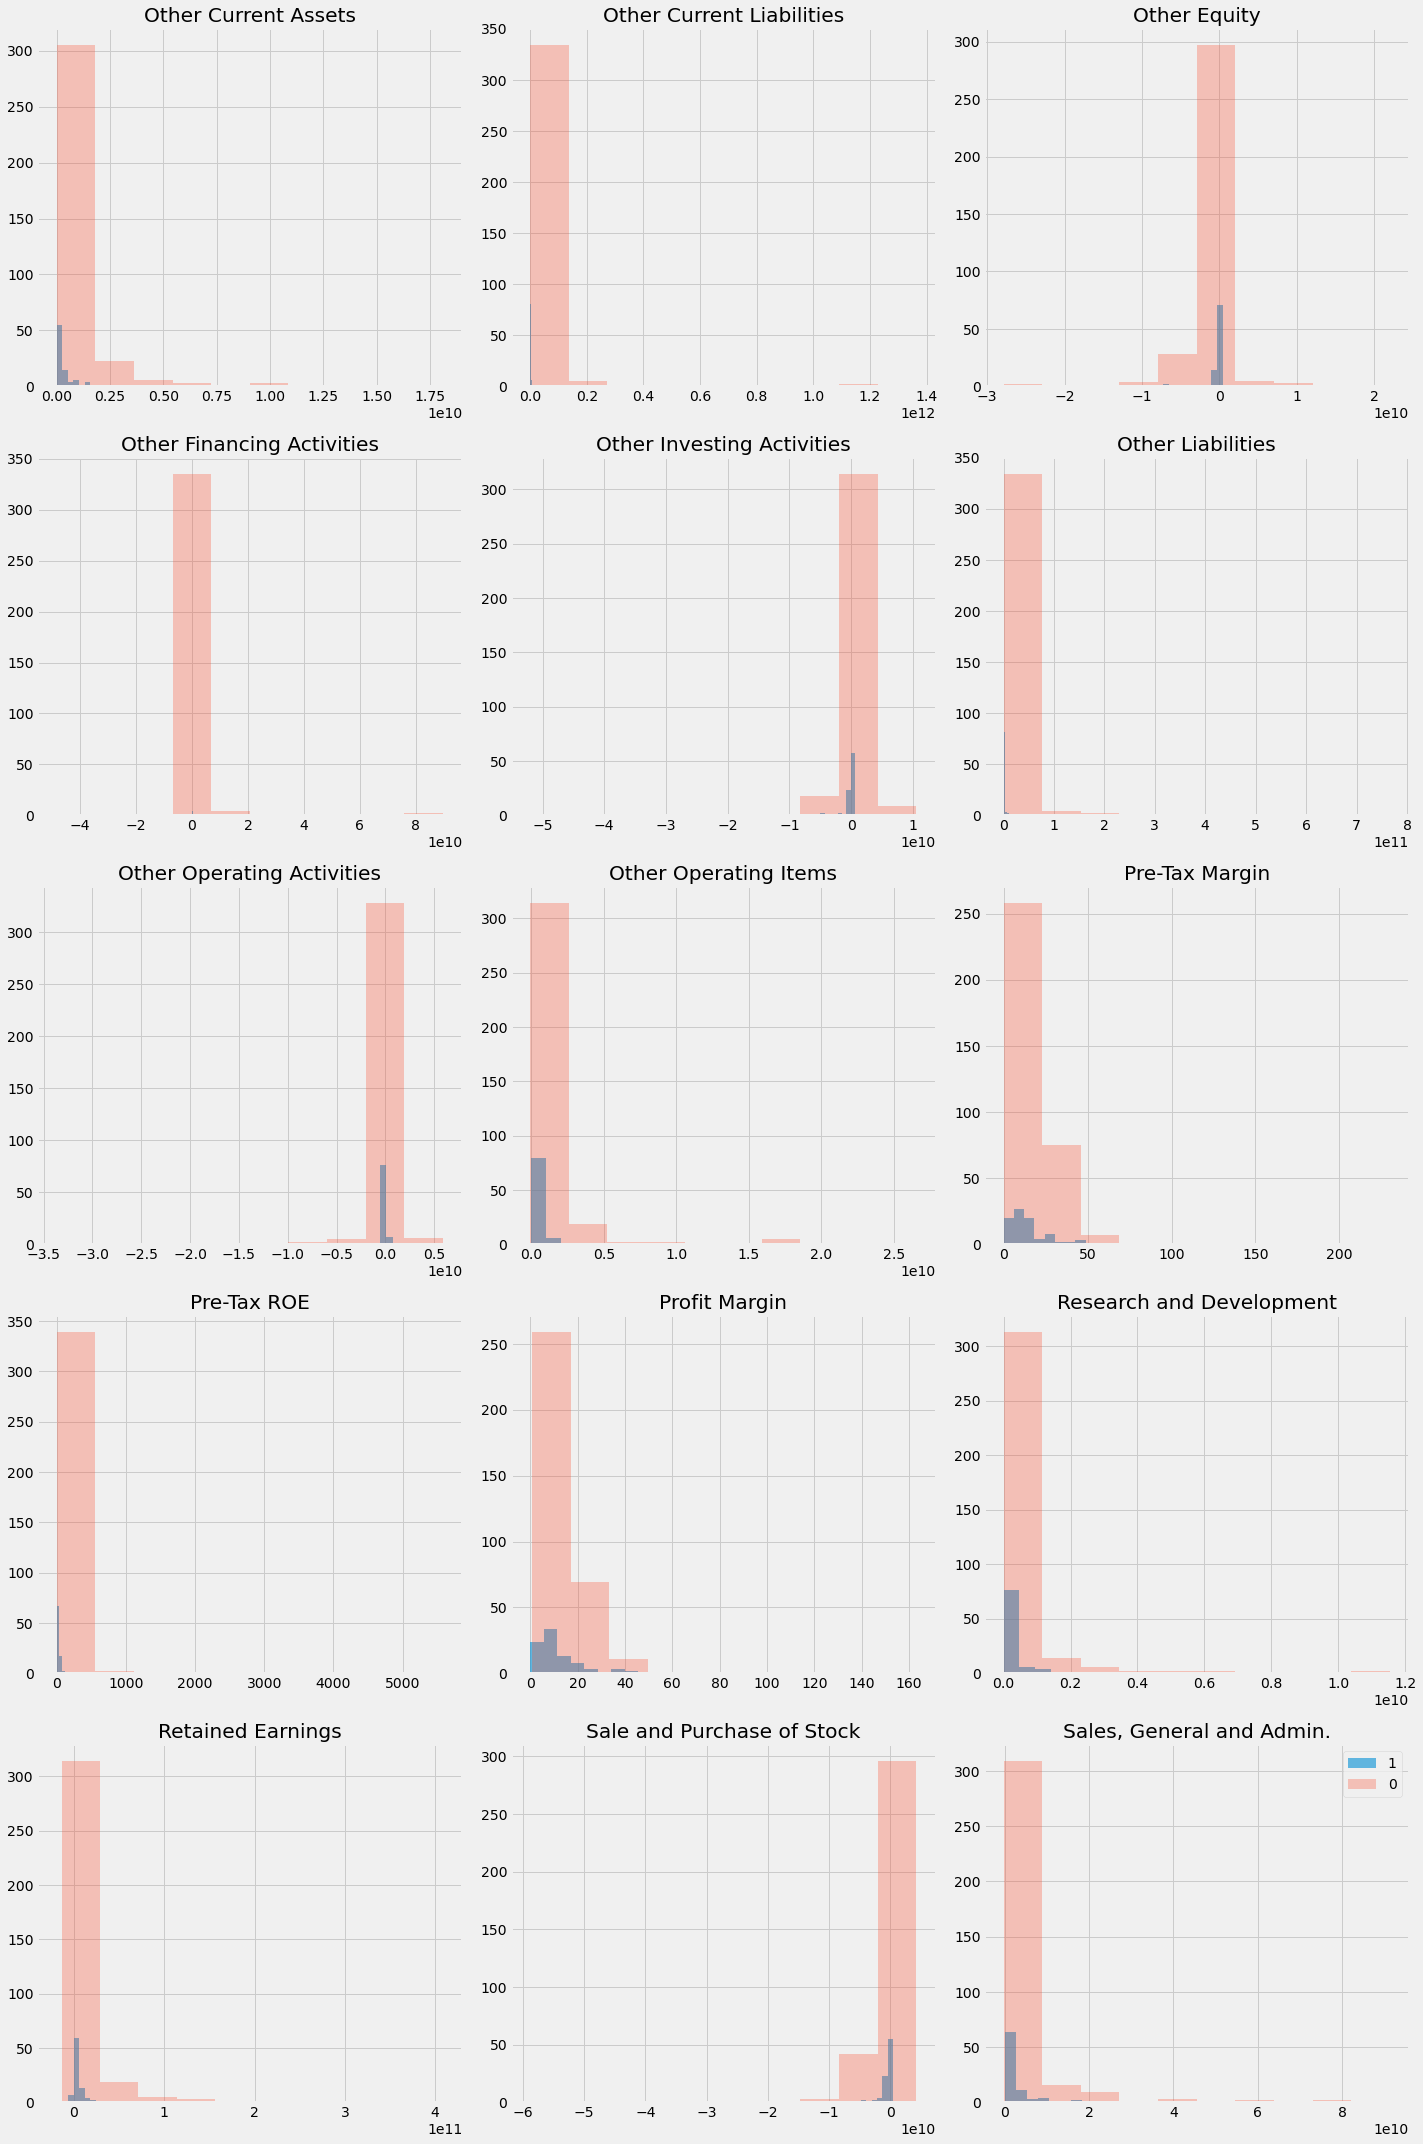

In [56]:
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[45:60]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[45:60]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-57-f5c37e46d74f>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


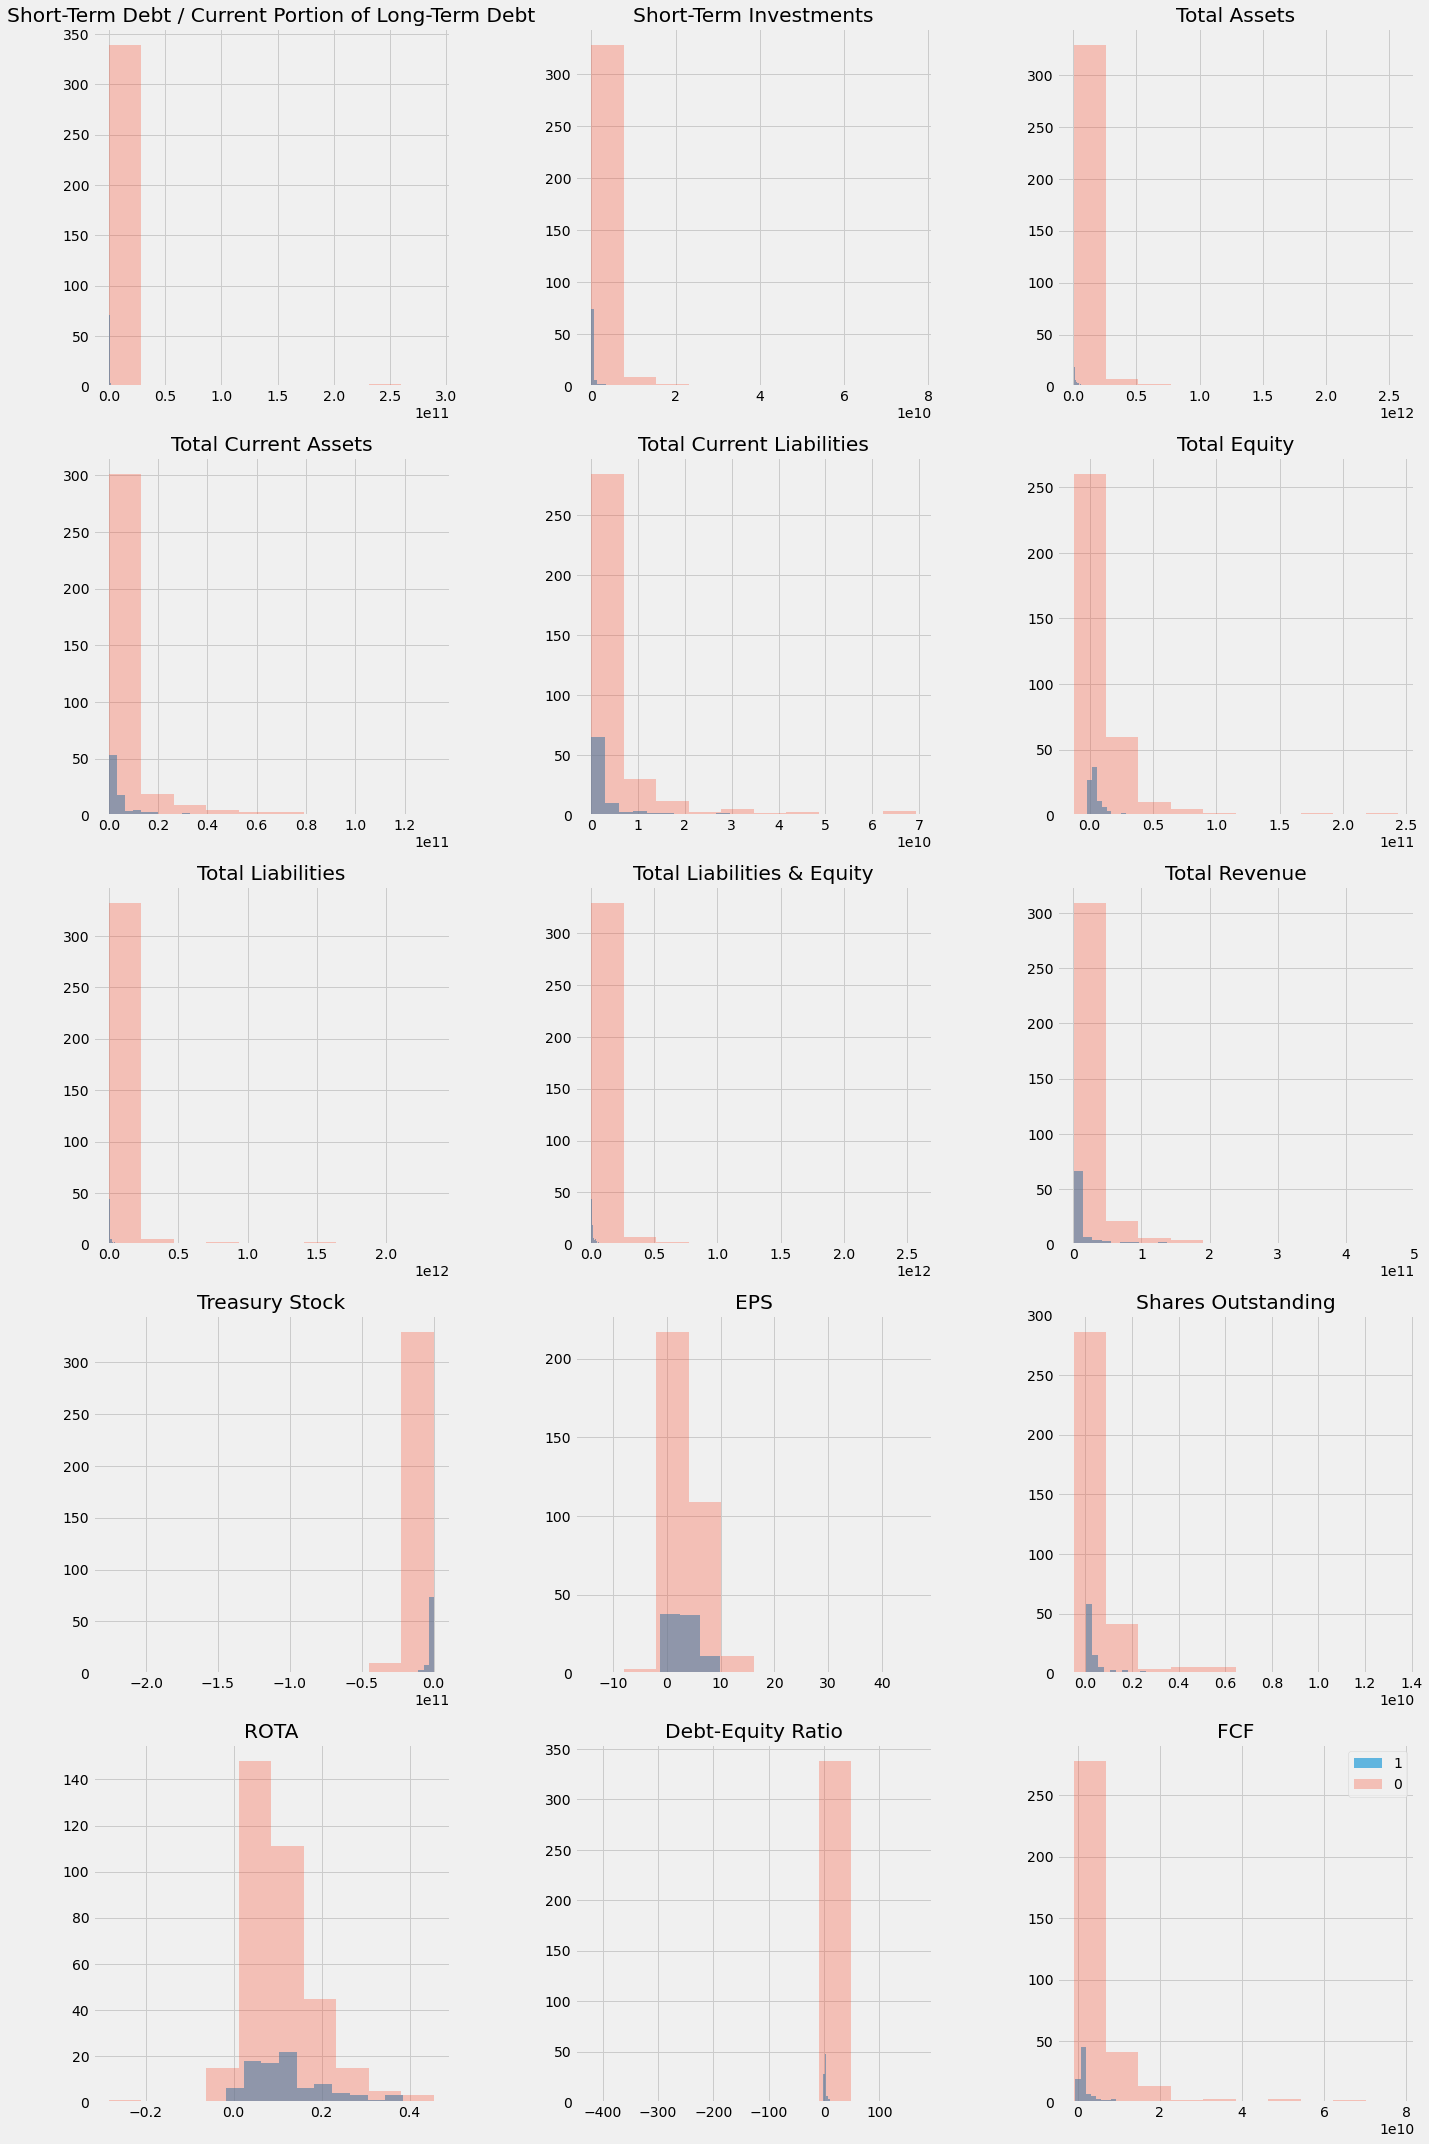

In [57]:
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[60:75]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[60:75]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-58-8614949c8338>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,3, i+1)


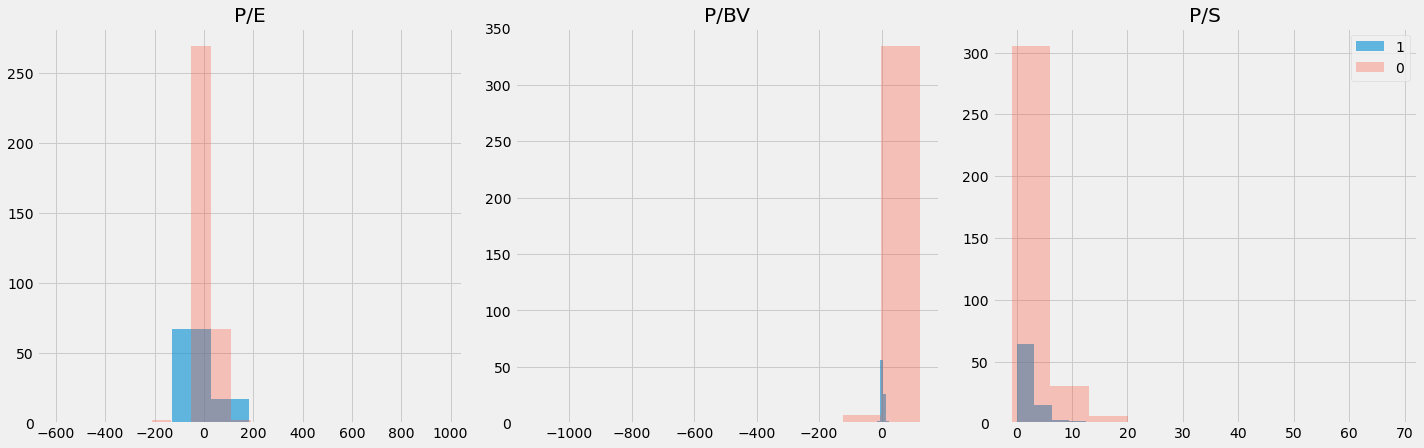

In [58]:
fig = plt.figure(figsize=(20,30))

for i, column in enumerate(yes.columns[75:]):
    plt.subplot(5,3, i+1)
    yes[column].hist(alpha=.6, label=1)
    plt.title(column)

for i, column in enumerate(no.columns[75:]):
    plt.subplot(5,3, i+1)
    no[column].hist(alpha=0.3, label=0)
    plt.title(column)

plt.tight_layout()
plt.legend()
plt.show()

In [59]:
df['P/BV'].describe()

count     431.00
mean        1.38
std        60.65
min     -1112.25
25%         1.87
50%         3.22
75%         5.38
max       122.85
Name: P/BV, dtype: float64

It appears that most companies fundmentals lie in the same bin. There are a few outliers depending on the feature. It is difficult to see some distributions due to the nature of some companies having vastly more assets or liabilities than others, which results in many tickers in the same bin. We take a closer look of the distributions for a few features below

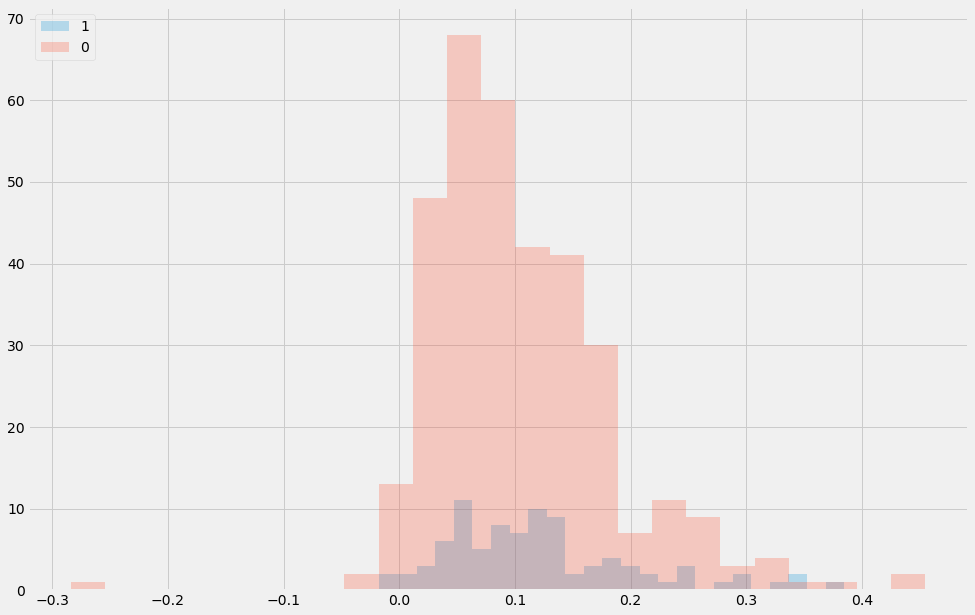

In [60]:
plt.figure(figsize=[15,10])
yes['ROTA'].hist(bins=25, alpha=0.25, label=1)
no['ROTA'].hist(bins=25, alpha=0.25, label=0)
plt.legend(loc='upper left')
plt.show()

ROTA appears to resemble a normal distribution

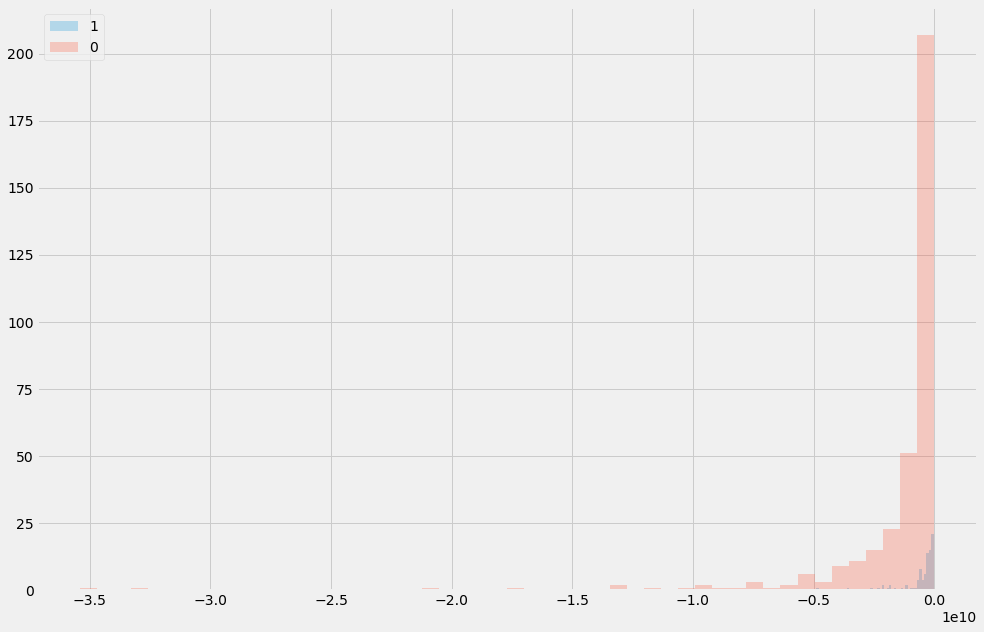

In [61]:
plt.figure(figsize=[15,10])
yes['Capital Expenditures'].hist(bins=50, alpha=0.25, label=1)
no['Capital Expenditures'].hist(bins=50, alpha=0.25, label=0)
plt.legend(loc='upper left')
plt.show()

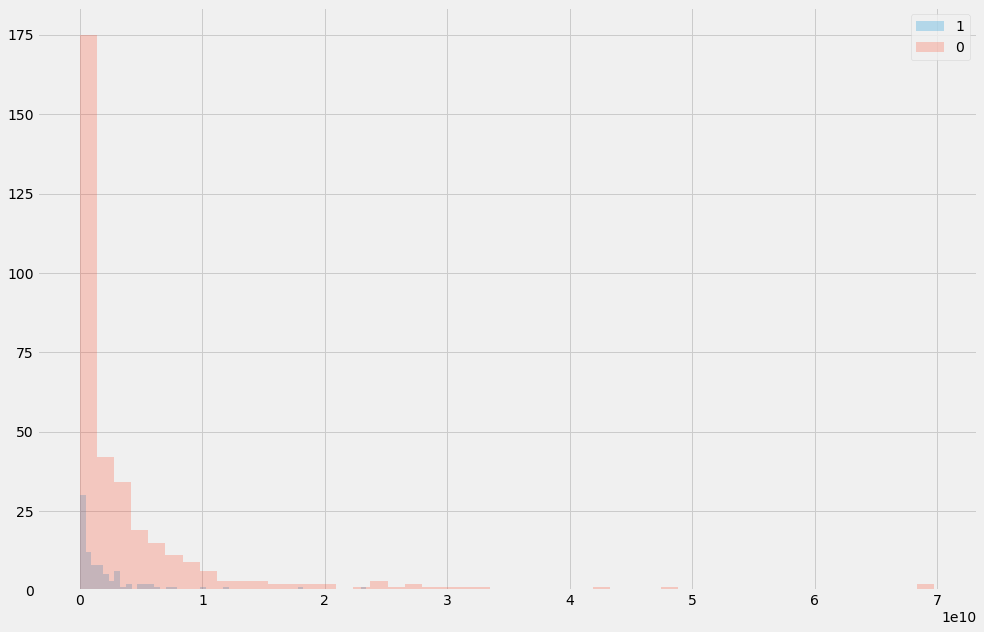

In [62]:
plt.figure(figsize=[15,10])
yes['Goodwill'].hist(bins=50, alpha=0.25, label=1)
no['Goodwill'].hist(bins=50, alpha=0.25, label=0)
plt.legend(loc='upper right')
plt.show()

## Boxplots

In [63]:
df_features = df.drop(columns=['target'])

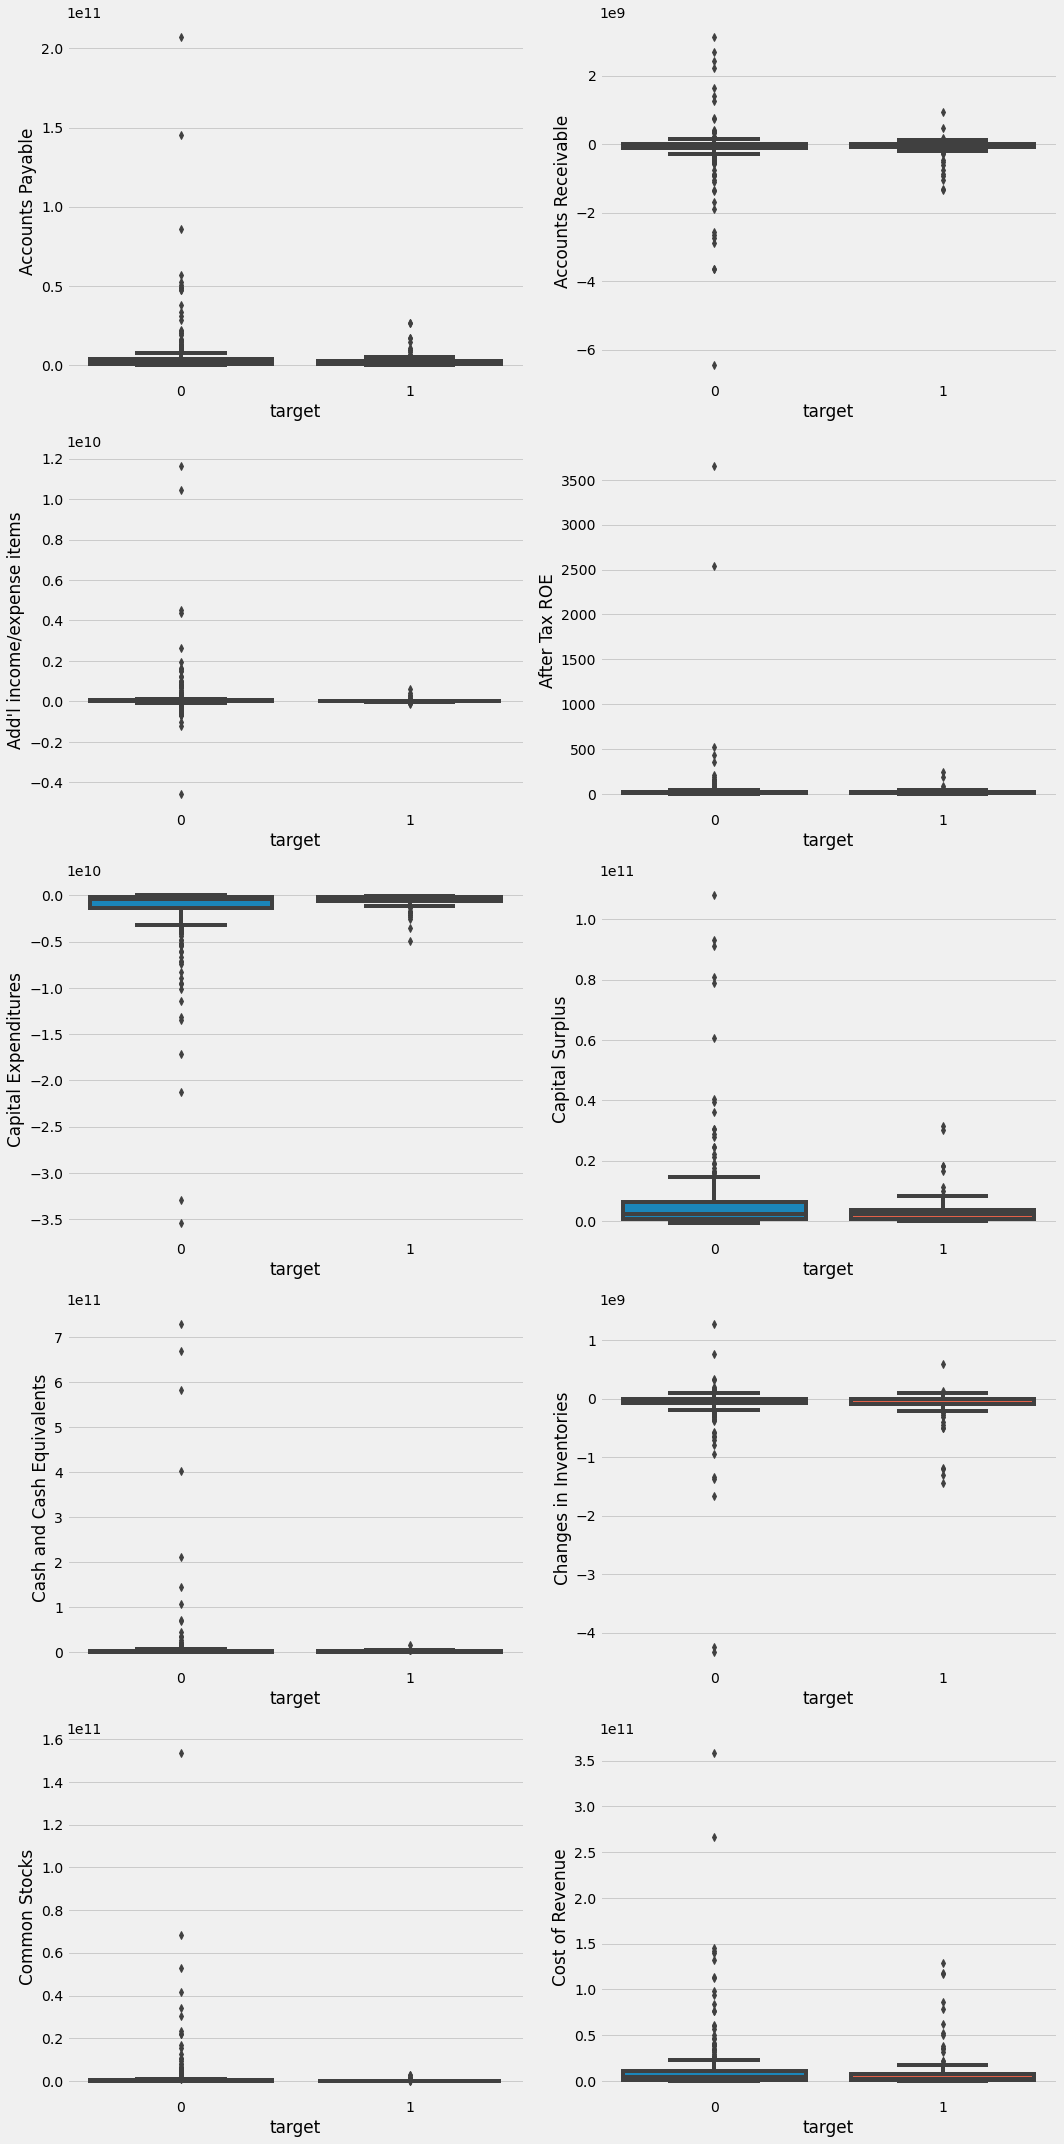

In [64]:
# Boxplots
fig = plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_features.columns[:10]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

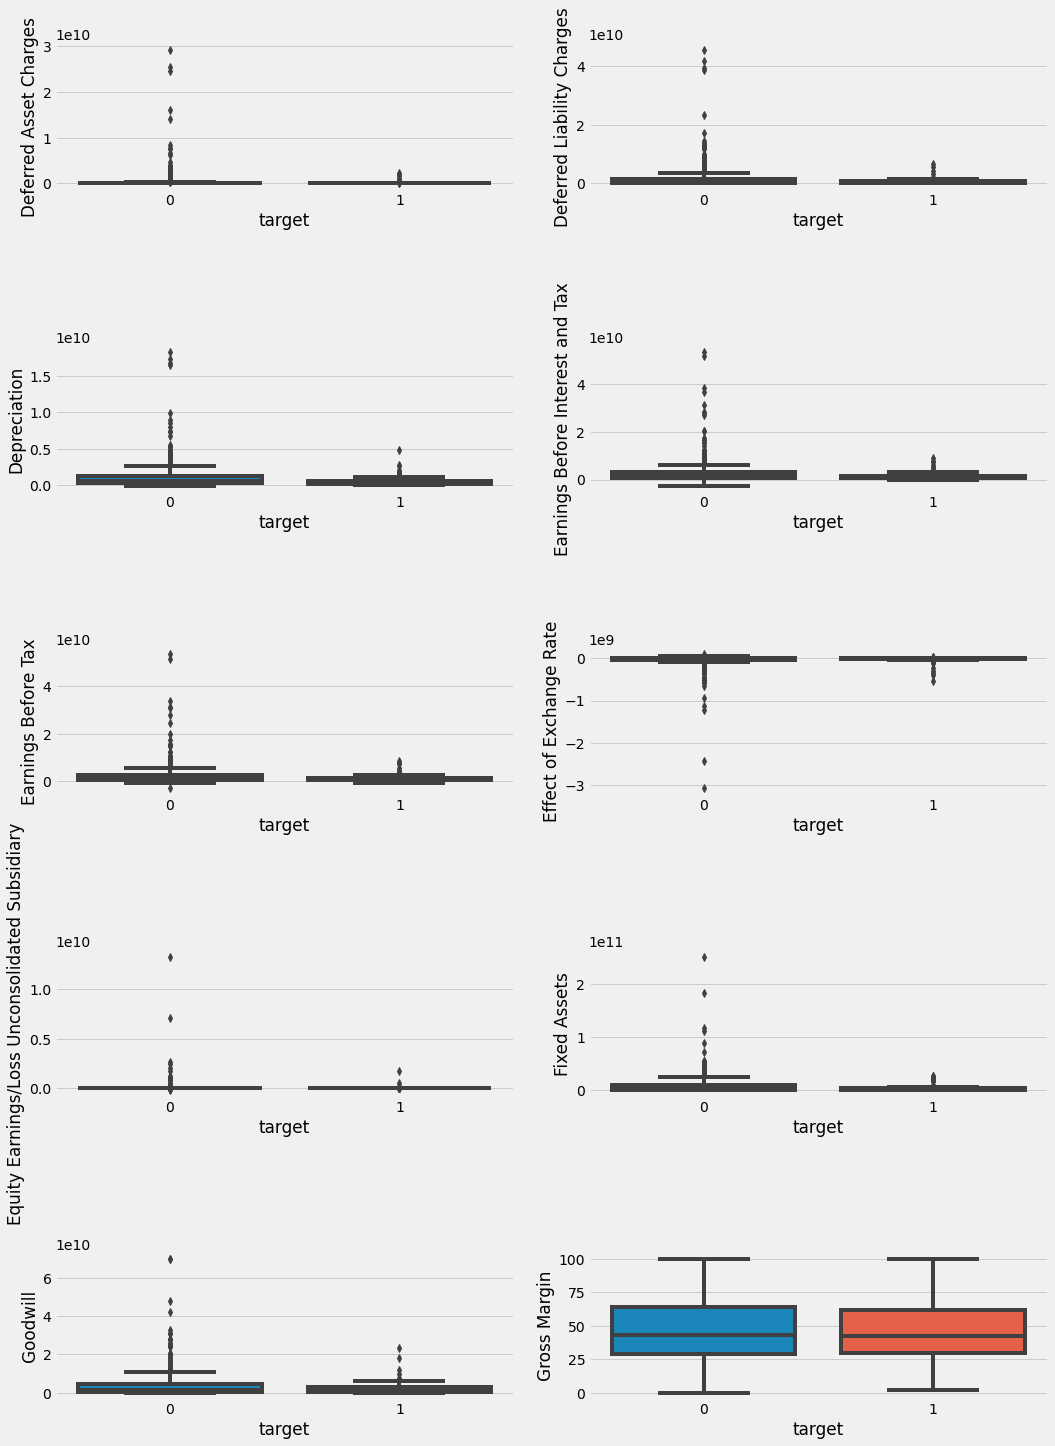

In [65]:
fig = plt.figure(figsize=(15, 20))

for i, feature in enumerate(df_features.columns[10:20]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

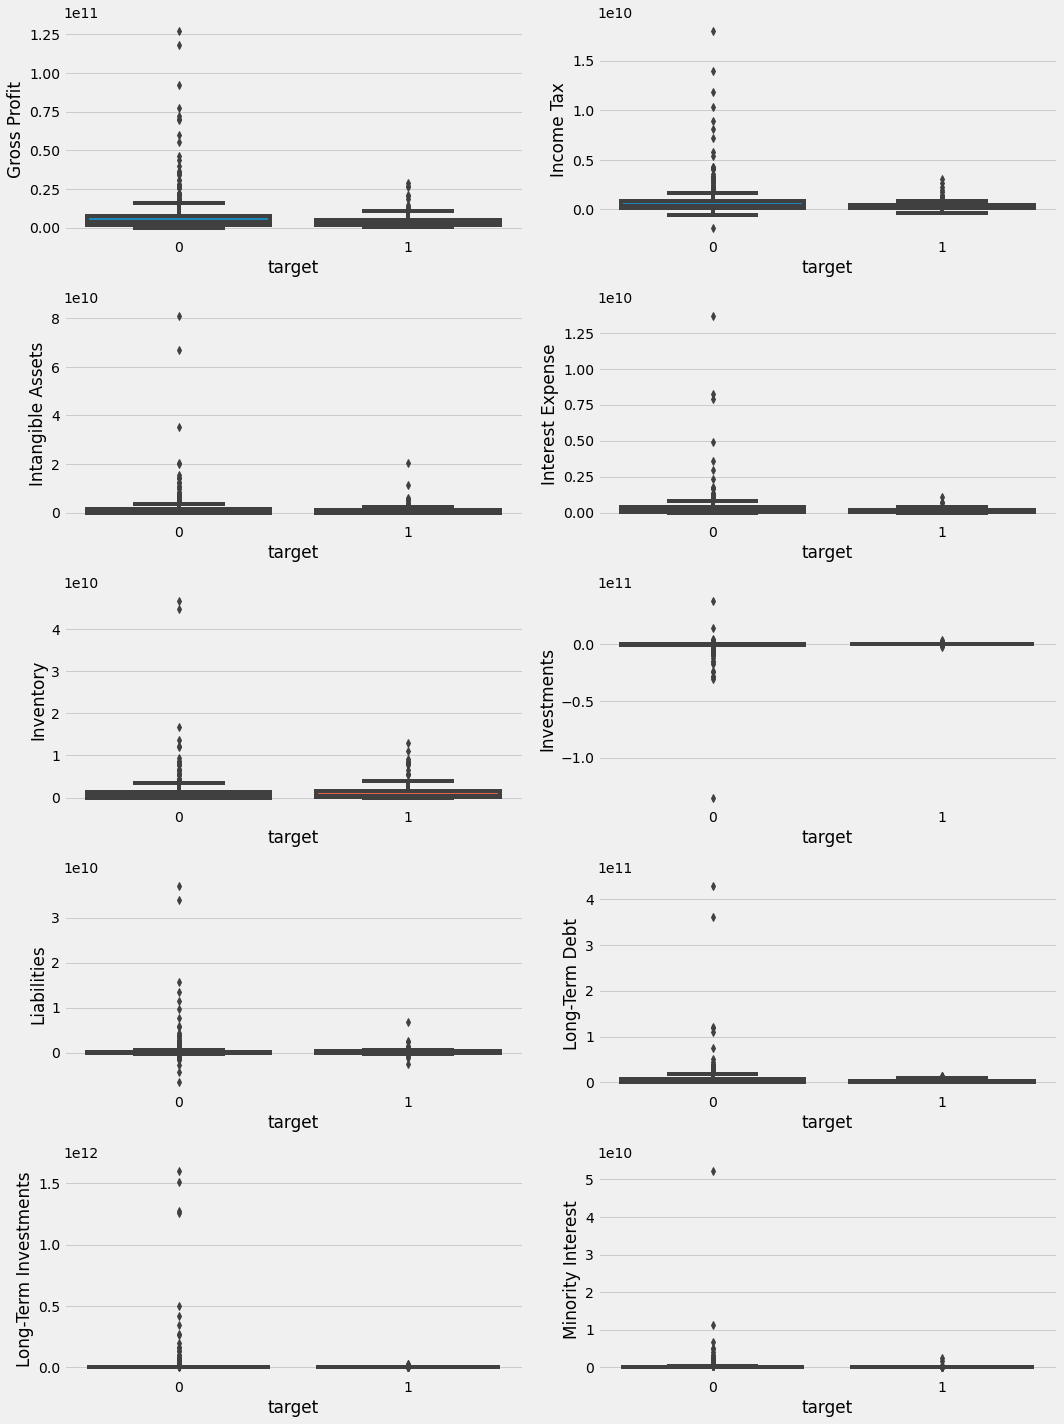

In [66]:
fig = plt.figure(figsize=(15, 20))

for i, feature in enumerate(df_features.columns[20:30]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

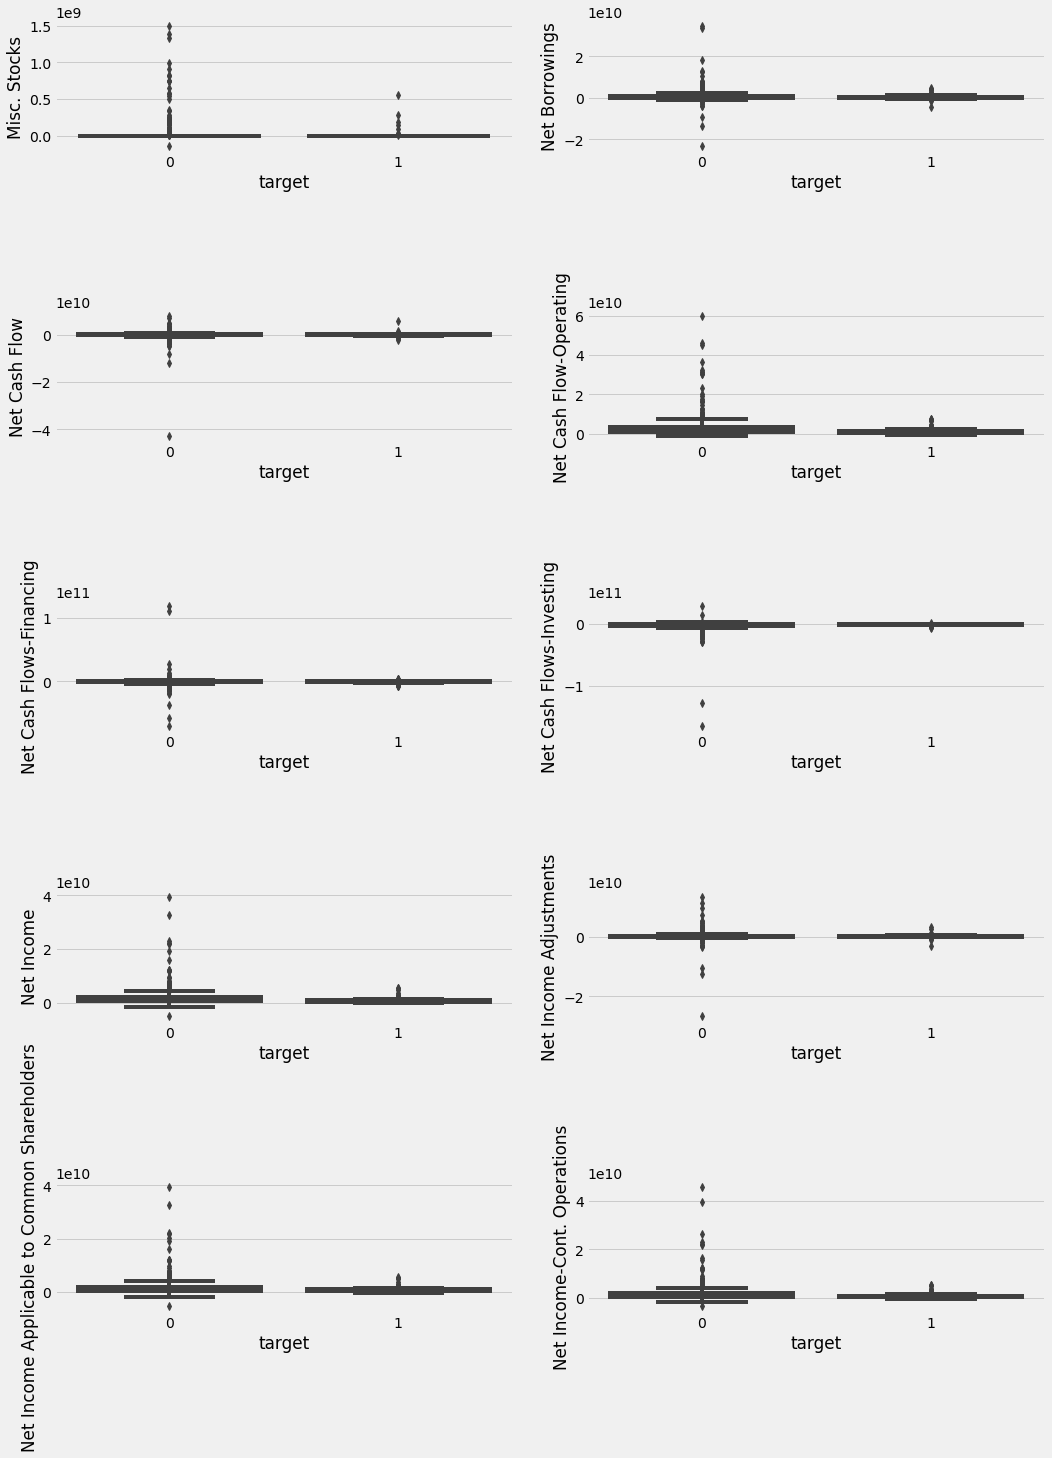

In [67]:
fig = plt.figure(figsize=(15, 20))

for i, feature in enumerate(df_features.columns[30:40]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

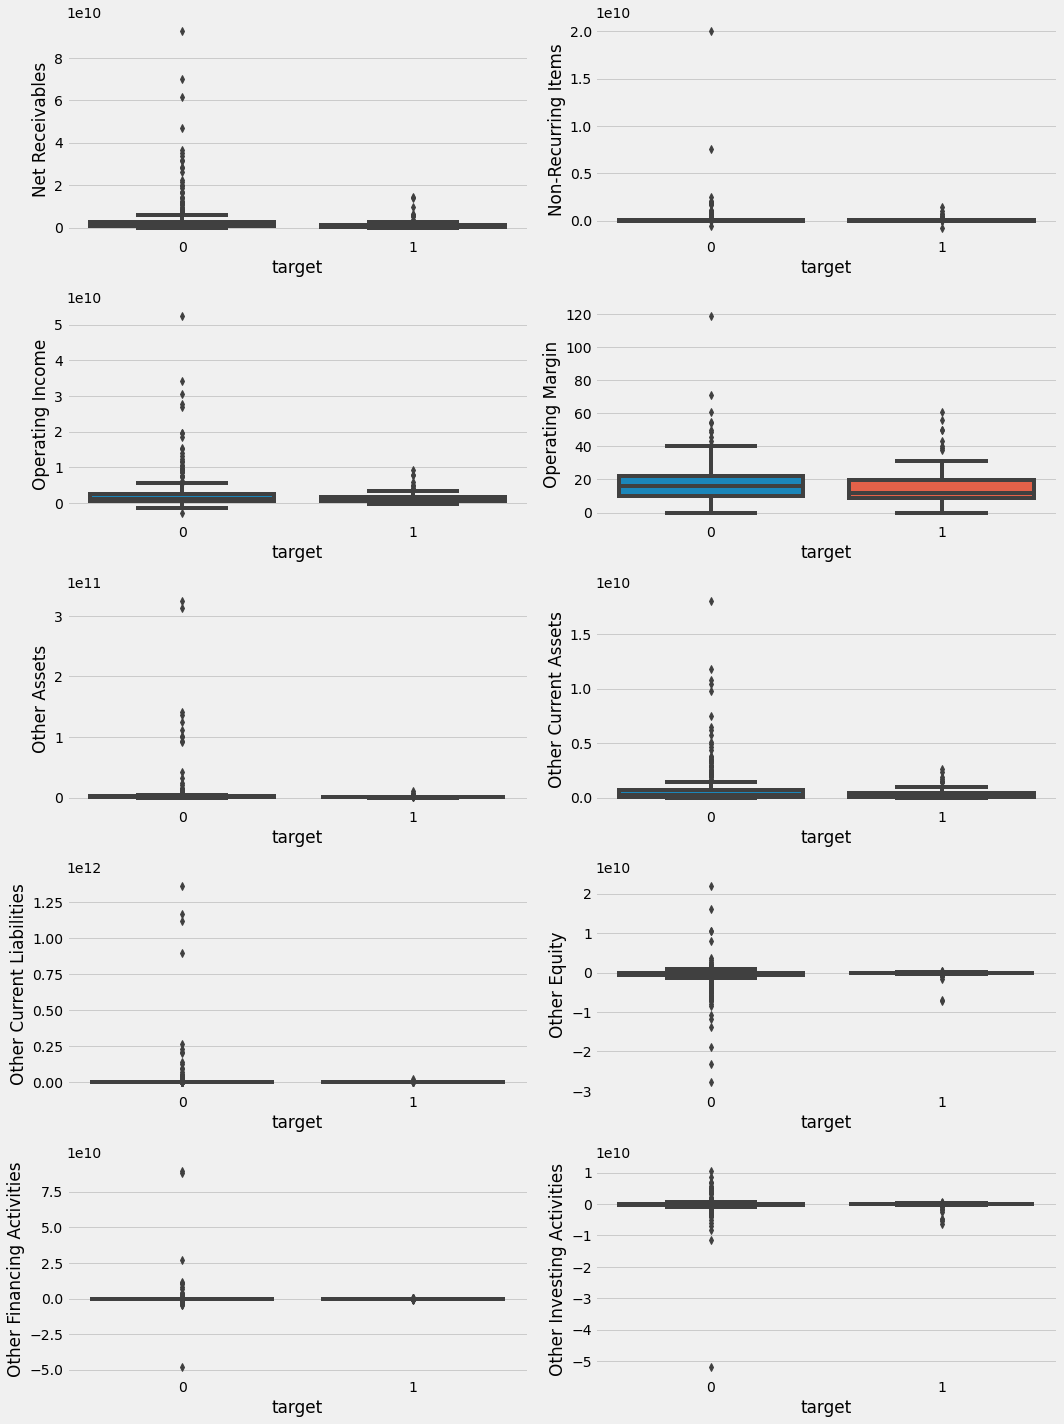

In [68]:
fig = plt.figure(figsize=(15, 20))

for i, feature in enumerate(df_features.columns[40:50]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

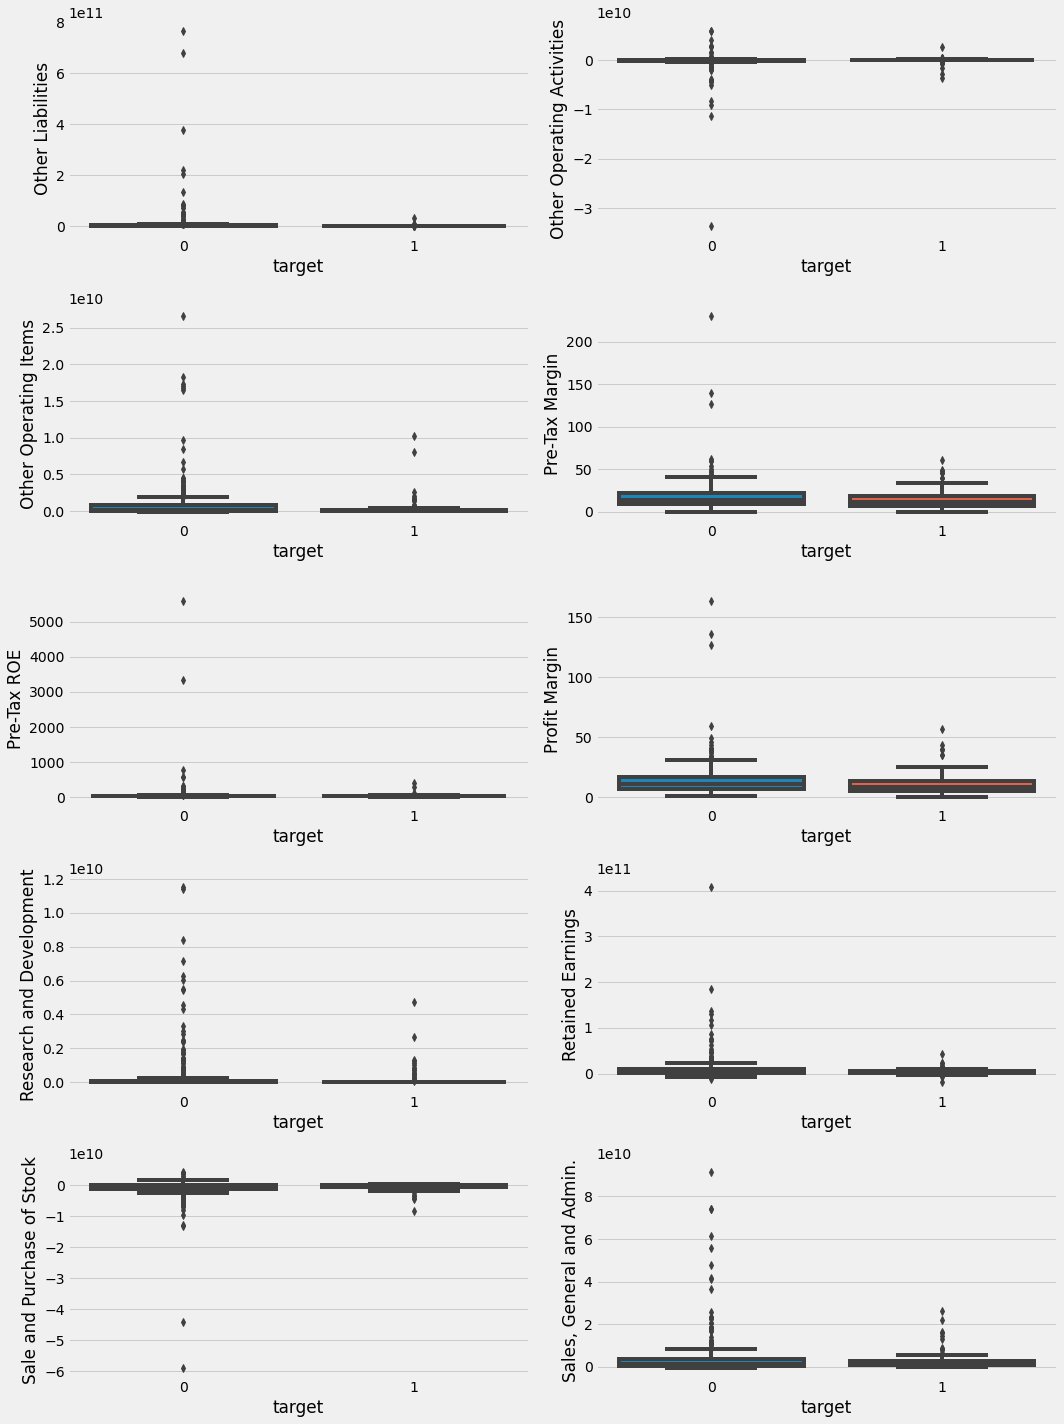

In [69]:
fig = plt.figure(figsize=(15, 20))

for i, feature in enumerate(df_features.columns[50:60]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

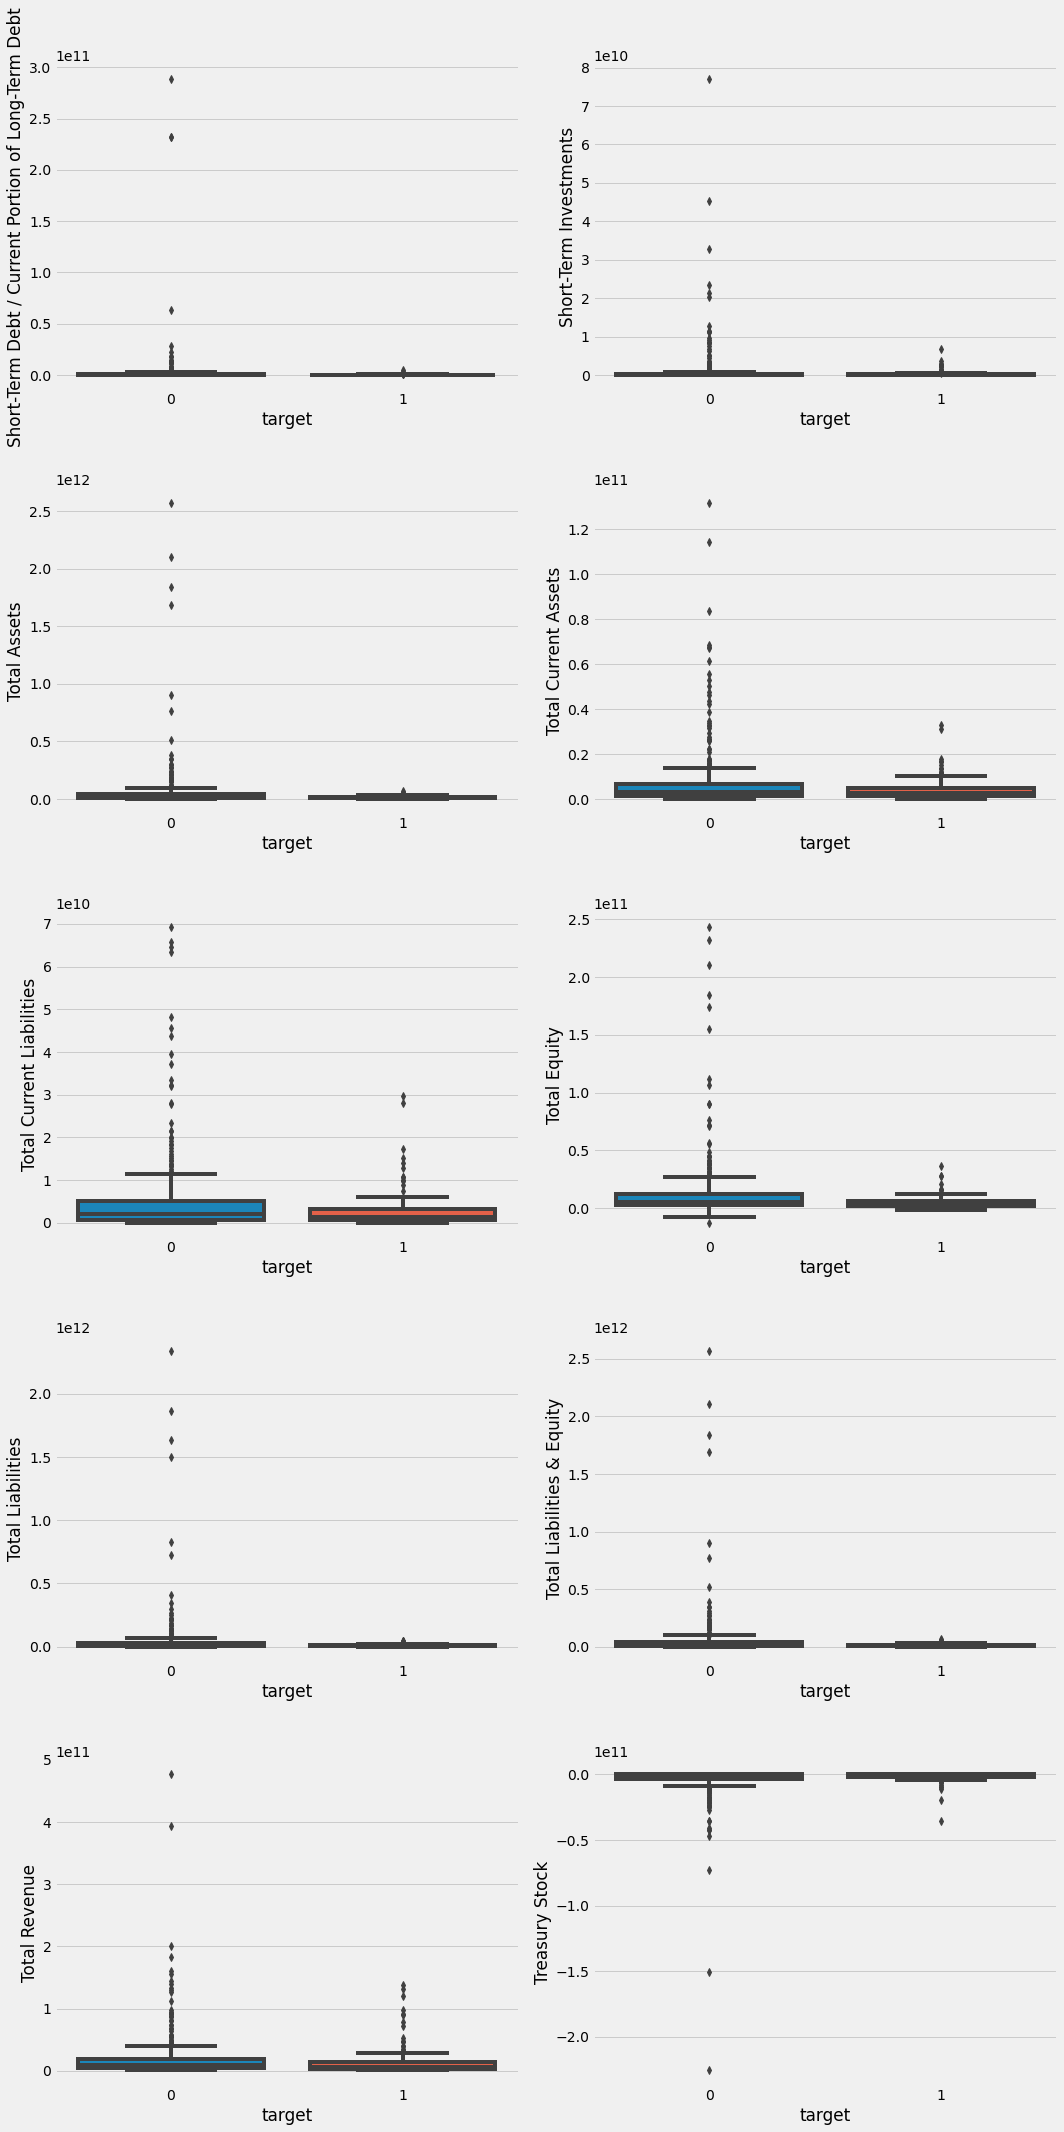

In [70]:
fig = plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_features.columns[60:70]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

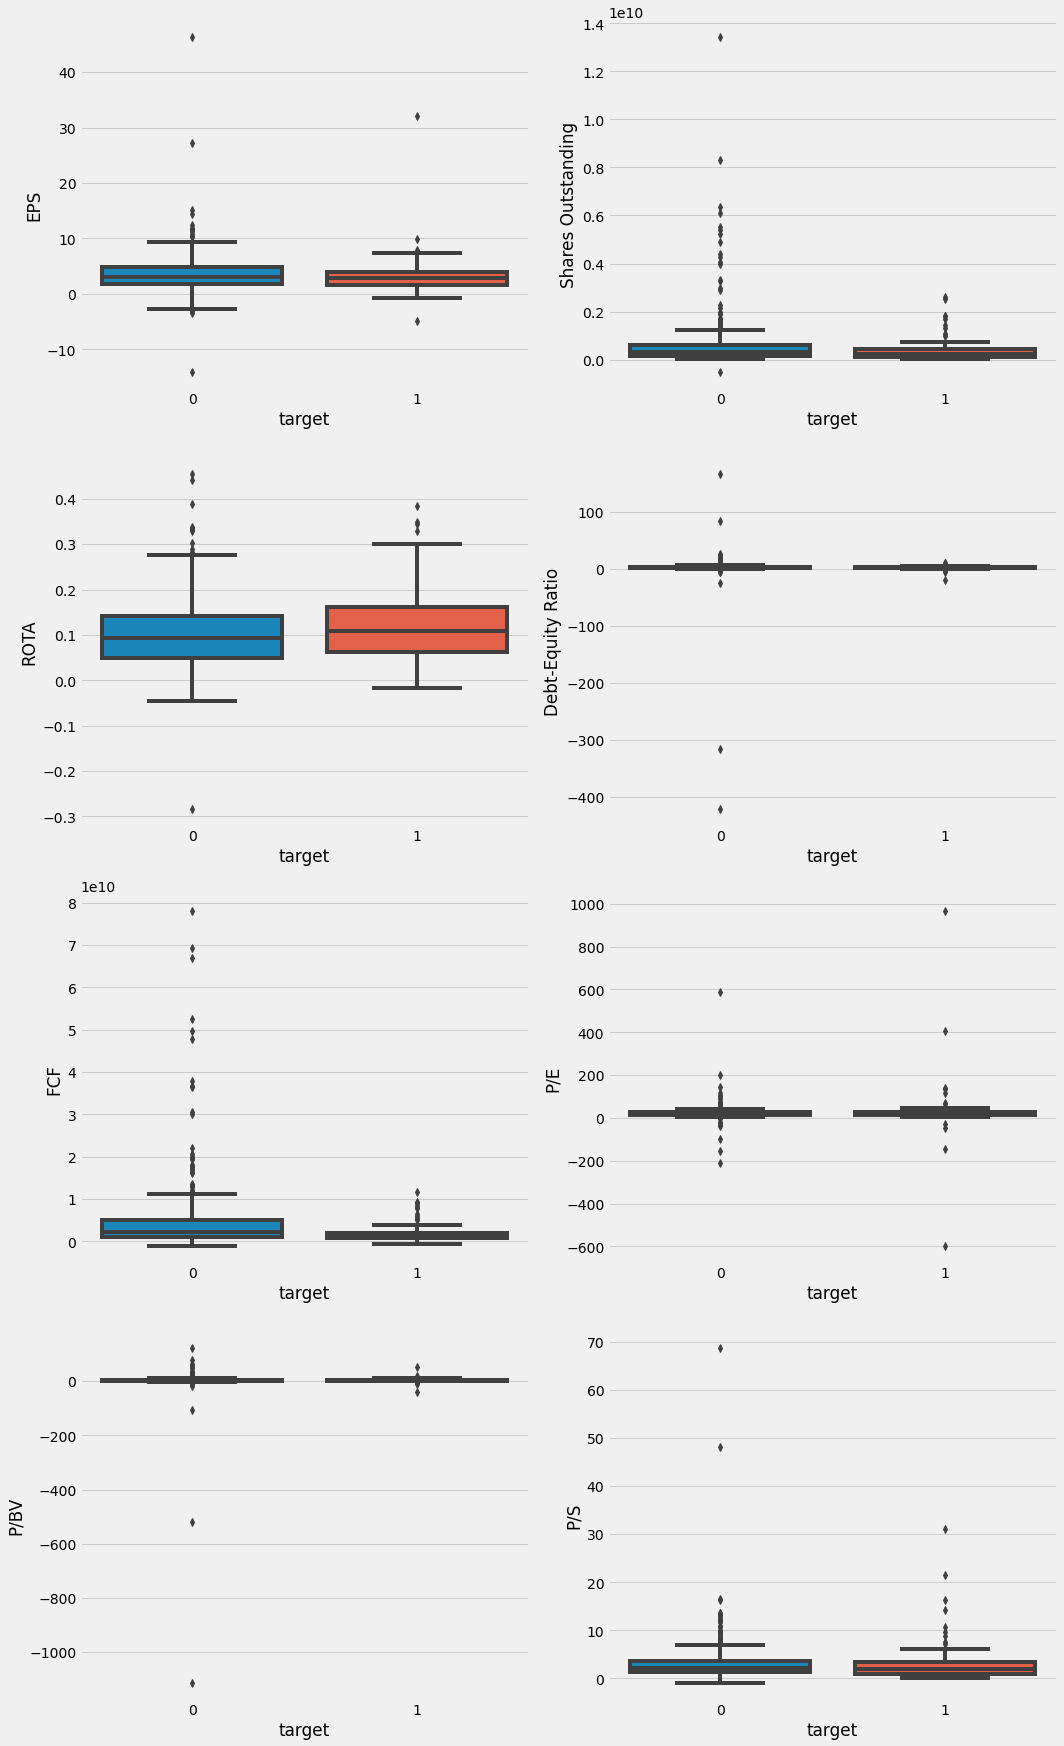

In [71]:
fig = plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_features.columns[70:]):
    plt.subplot(5, 2, i+1)
    plot = sns.boxplot(x= 'target', y=feature, data= df)
    
fig.tight_layout()
plt.show()

The boxplots show that there does not appear to be huge differences in the fundamentals between the companies that had a 20% return and the companies that did not have a 20% return, albeit it is difficult to tell due to the ranges. ROTA, FCF, Operating Margin, Total Current Liabilities, and Total Equity  have the biggest noticeable differences in boxplots between the 1s and 0s. The boxplots also clearly show that there are many outliers that could affect the data as there numerous points outside `1.5*IQR`.